# Graph Mining on Walmart and Facebook Data

In [9]:
# Retrieve csv file from google drive by mapping the folder from google drive. 
# Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import networkx

### Installation information available here - https://networkx.org/documentation/stable/install.html

#### !pip install networkx

### Find tutorials, references and background of networkx here - https://networkx.org/documentation/stable/index.html

In [10]:
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy import stats
import csv

In [11]:
np.random.seed(123456)

# Undirected Graph - Karate Club Graph

#### - https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html#networkx.generators.social.karate_club_graph



# Graph drawing and information with a graph embedded in networkx

In [12]:
# Retrieve and safe a copy the karate_club_graph()
kc_g = nx.karate_club_graph()

In [13]:
# Show basic graph information
print(nx.info(kc_g))

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


In [14]:
# help(nx.draw)

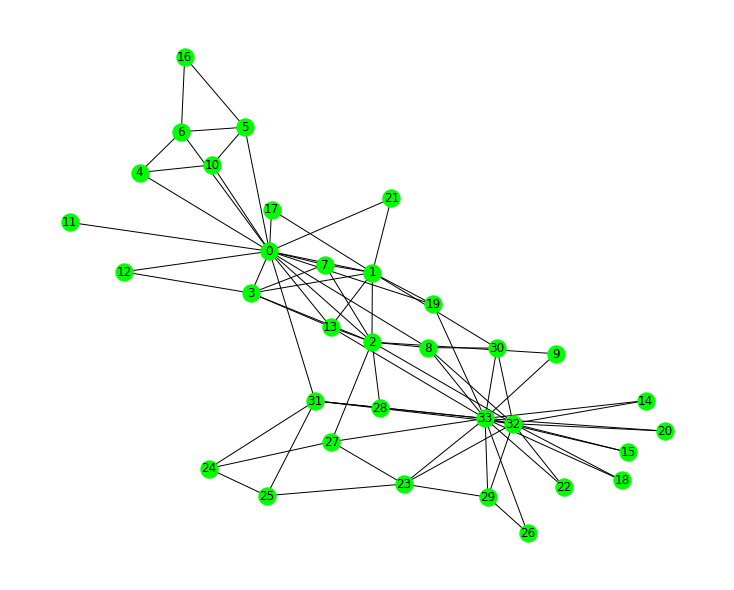

In [15]:
# nx.draw is a simple graph drawing function that utilizes Matplotlib
# sacle up the figsize
plt.figure(figsize=(10,8))
nx.draw(kc_g, with_labels=True, node_color='lime')

In [16]:
# help(nx.draw_networkx)

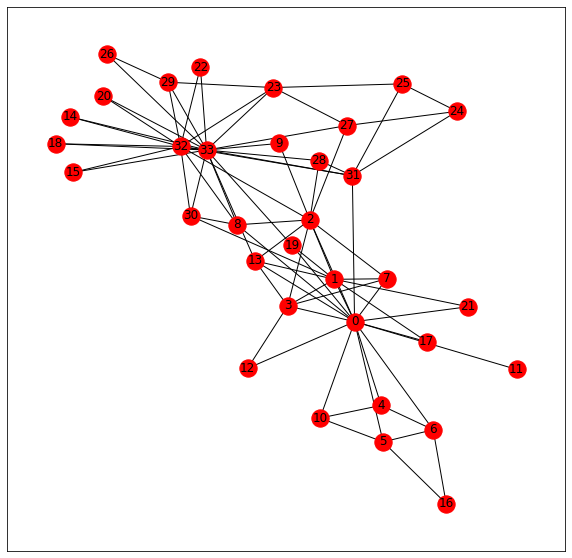

In [17]:
# Draw graphs using nx.draw_networkx 
plt.figure(figsize=(10,10))
nx.draw_networkx(kc_g, with_labels=True, node_color='red') 

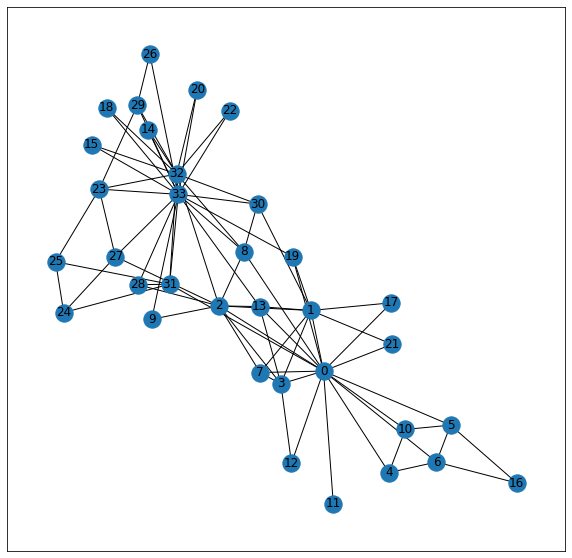

In [18]:
plt.figure(figsize=(10,10))
nx.draw_networkx(kc_g, pos = nx.spring_layout(kc_g), with_labels=True) 

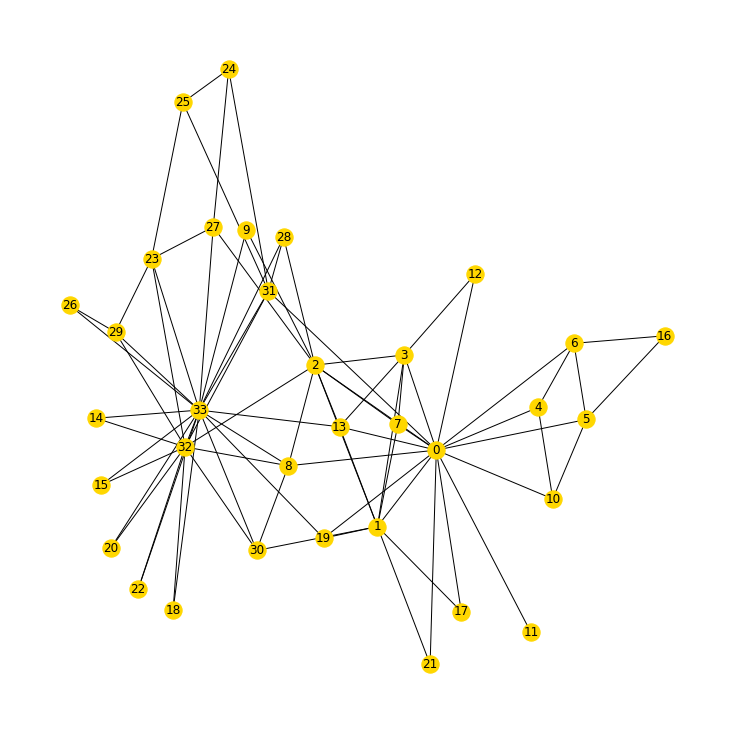

In [19]:
plt.figure(figsize=(10,10))
nx.draw_spring(kc_g, with_labels=True, node_color='gold')
plt.show()

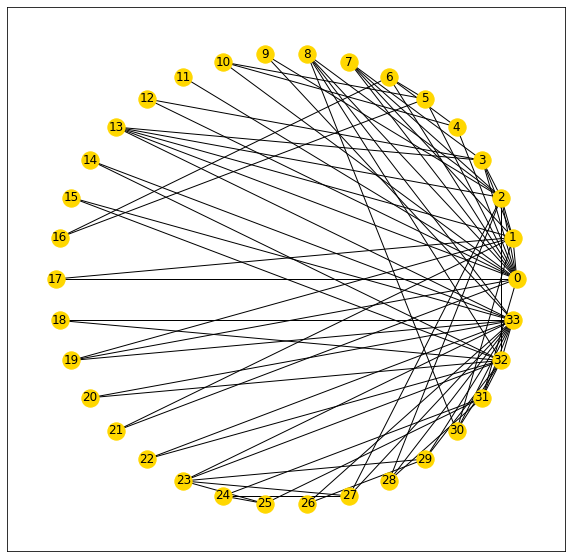

In [20]:
plt.figure(figsize=(10,10))
g_layout = nx.circular_layout(kc_g)
nx.draw_networkx(kc_g, g_layout, with_labels=True, node_color='gold') 

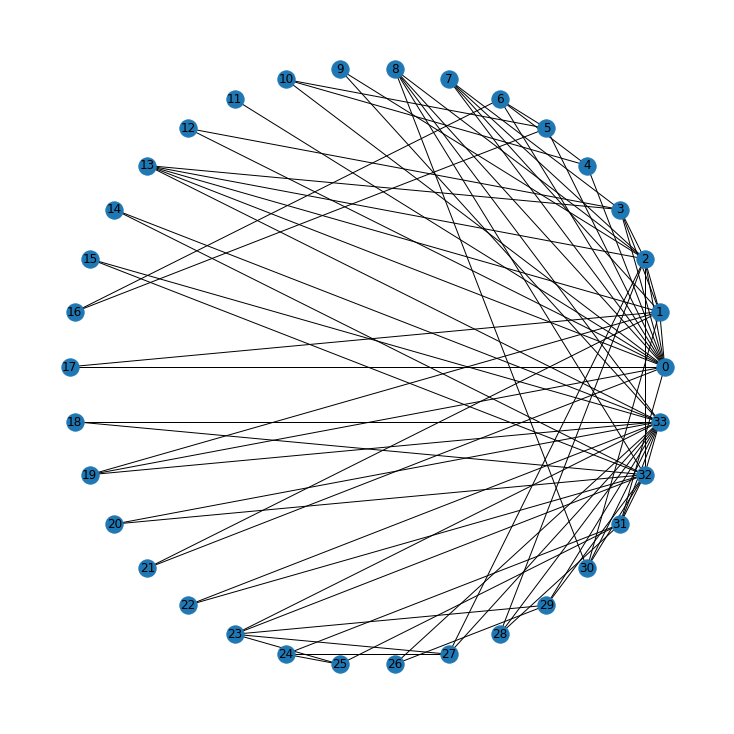

In [21]:
plt.figure(figsize=(10,10))
nx.draw_circular(kc_g, with_labels=True)
plt.show()

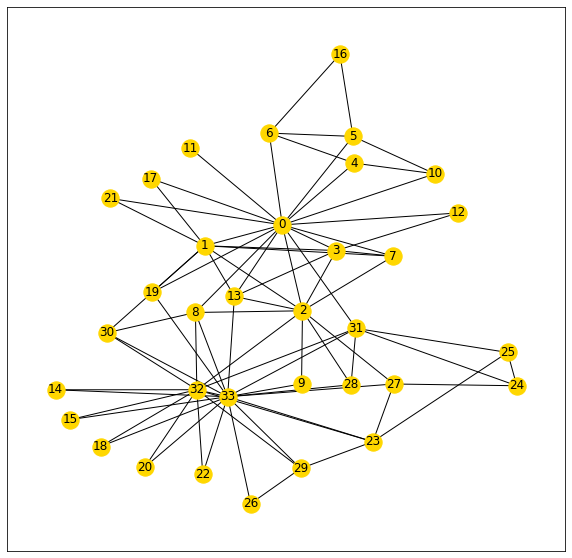

In [22]:
# nx.kamada_kawai is also a nice node positioning algorithm
plt.figure(figsize=(10,10))
g_layout = nx.kamada_kawai_layout(kc_g)
nx.draw_networkx(kc_g, g_layout, with_labels=True, node_color='gold') 

## Edge and Node Reporting

In [23]:
# It is not practical to show all nodes and node information this way
print(kc_g.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [24]:
kc_g.nodes('club')

NodeDataView({0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}, data='club')

In [25]:
kc_g.nodes('club')[0]

'Mr. Hi'

In [26]:
print("Node   club\n")
for v in kc_g:
    print(f"{v:4}   {kc_g.nodes('club')[v]}")

Node   club

   0   Mr. Hi
   1   Mr. Hi
   2   Mr. Hi
   3   Mr. Hi
   4   Mr. Hi
   5   Mr. Hi
   6   Mr. Hi
   7   Mr. Hi
   8   Mr. Hi
   9   Officer
  10   Mr. Hi
  11   Mr. Hi
  12   Mr. Hi
  13   Mr. Hi
  14   Officer
  15   Officer
  16   Mr. Hi
  17   Mr. Hi
  18   Officer
  19   Mr. Hi
  20   Officer
  21   Mr. Hi
  22   Officer
  23   Officer
  24   Officer
  25   Officer
  26   Officer
  27   Officer
  28   Officer
  29   Officer
  30   Officer
  31   Officer
  32   Officer
  33   Officer


In [27]:
print(f'Number of nodes: {kc_g.number_of_nodes()}, Number of edges: {kc_g.number_of_edges()}')

Number of nodes: 34, Number of edges: 78


In [28]:
# It is not practical to show all of the edges this way
kc_g.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

In [29]:
print('Graph edges:\n')
for e in kc_g.edges: print(e)

Graph edges:

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 10)
(0, 11)
(0, 12)
(0, 13)
(0, 17)
(0, 19)
(0, 21)
(0, 31)
(1, 2)
(1, 3)
(1, 7)
(1, 13)
(1, 17)
(1, 19)
(1, 21)
(1, 30)
(2, 3)
(2, 7)
(2, 8)
(2, 9)
(2, 13)
(2, 27)
(2, 28)
(2, 32)
(3, 7)
(3, 12)
(3, 13)
(4, 6)
(4, 10)
(5, 6)
(5, 10)
(5, 16)
(6, 16)
(8, 30)
(8, 32)
(8, 33)
(9, 33)
(13, 33)
(14, 32)
(14, 33)
(15, 32)
(15, 33)
(18, 32)
(18, 33)
(19, 33)
(20, 32)
(20, 33)
(22, 32)
(22, 33)
(23, 25)
(23, 27)
(23, 29)
(23, 32)
(23, 33)
(24, 25)
(24, 27)
(24, 31)
(25, 31)
(26, 29)
(26, 33)
(27, 33)
(28, 31)
(28, 33)
(29, 32)
(29, 33)
(30, 32)
(30, 33)
(31, 32)
(31, 33)
(32, 33)


### Adjacency matrix

In [30]:
#help(nx.adj_matrix)

In [31]:
# The default storage format of adjacency matrices is the sparse matrix format
print(nx.adj_matrix(kc_g))

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 17)	1
  (0, 19)	1
  (0, 21)	1
  (0, 31)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 7)	1
  (1, 13)	1
  (1, 17)	1
  (1, 19)	1
  (1, 21)	1
  (1, 30)	1
  :	:
  (32, 18)	1
  (32, 20)	1
  (32, 22)	1
  (32, 23)	1
  (32, 29)	1
  (32, 30)	1
  (32, 31)	1
  (32, 33)	1
  (33, 8)	1
  (33, 9)	1
  (33, 13)	1
  (33, 14)	1
  (33, 15)	1
  (33, 18)	1
  (33, 19)	1
  (33, 20)	1
  (33, 22)	1
  (33, 23)	1
  (33, 26)	1
  (33, 27)	1
  (33, 28)	1
  (33, 29)	1
  (33, 30)	1
  (33, 31)	1
  (33, 32)	1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  


In [32]:
# Show an adjacency matrix in a dense matrix format
print(nx.adj_matrix(kc_g).todense())

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  


## Node Degrees

In [33]:
# It is not practical to show all node degrees this way
kc_g.degree

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [34]:
kc_g.degree(0)

16

In [35]:
print("Node Degree\n")
for v in kc_g.nodes:
    print(f"{v:4} {kc_g.degree(v):6}")
# right-justified each column

Node Degree

   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


In [36]:
# help(nx.degree_histogram)

In [37]:
nx.degree_histogram(kc_g)
# Frequency (# of nodes) of a degree - 0, 1, 2, up to 17

[0, 1, 11, 6, 6, 3, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]

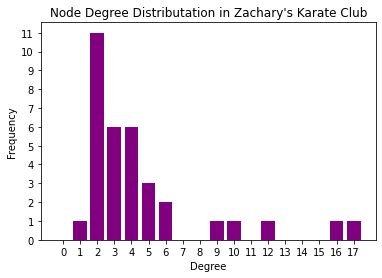

In [38]:
# Draw a bar graph of number of Node Degree Distribution
# create x and y values of each bar
y_axis = nx.degree_histogram(kc_g)
x_axis = list(range(0,len(y_axis)))
# Draw bars using y_axis and x_axis
plt.bar(x_axis, y_axis, color = 'purple')
# draw tick labels
plt.xticks(x_axis)
plt.yticks(list(range(0,max(y_axis)+1)))
# Add title and axis names
plt.title(f'Node Degree Distributation in {kc_g.name}')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

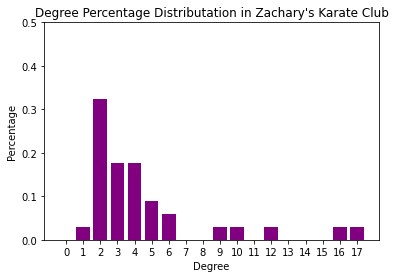

In [39]:
degrees = nx.degree_histogram(kc_g)
y_axis =  [i/sum(degrees) for i in degrees]
# x_axis = list(range(0,len(y_axis)))
plt.bar(x_axis, y_axis, color = 'purple')
# Draw axis labels 
plt.xticks(x_axis)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5])
# Add title and axis names
plt.title(f'Degree Percentage Distributation in {kc_g.name}')
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.ylim(0,0.5)
plt.show()

### Using node information to draw nodes

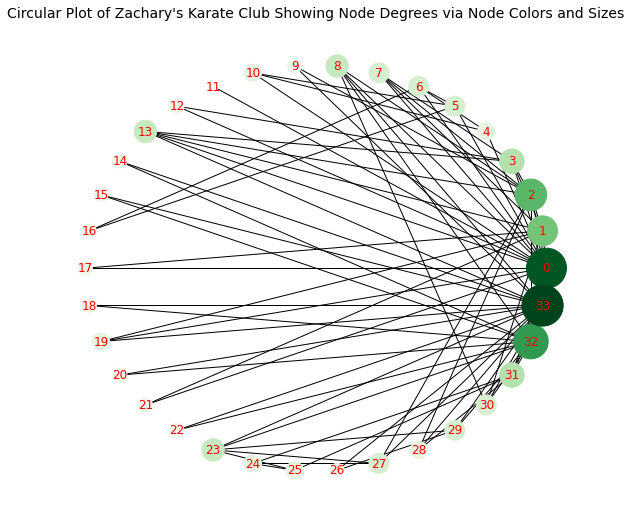

In [40]:
plt.figure(figsize=(10,9))
plt.title(f'Circular Plot of {kc_g.name} Showing Node Degrees via Node Colors and Sizes', fontsize = 14)
degree_color = [kc_g.degree(v) for v in kc_g]
degree_size = [100*kc_g.degree(v) for v in kc_g]
nx.draw_circular(kc_g, node_color = degree_color , node_size = (degree_size),font_color = 'r', with_labels=True, cmap = plt.cm.Greens)
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.show()

## Distance Measures

In [41]:
#help(nx.shortest_path)

In [42]:
nx.shortest_path(kc_g,0,33)

[0, 8, 33]

In [43]:
nx.shortest_path_length(kc_g,0,33)

2

In [44]:
nx.shortest_path(kc_g,6,33)

[6, 0, 8, 33]

In [45]:
nx.shortest_path(kc_g,6,33)

[6, 0, 8, 33]

In [46]:
nx.shortest_path_length(kc_g,6,33)

3

In [47]:
nx.shortest_path(kc_g,33)

{0: [33, 8, 0],
 1: [33, 13, 1],
 2: [33, 8, 2],
 3: [33, 13, 3],
 4: [33, 8, 0, 4],
 5: [33, 8, 0, 5],
 6: [33, 8, 0, 6],
 7: [33, 8, 0, 7],
 8: [33, 8],
 9: [33, 9],
 10: [33, 8, 0, 10],
 11: [33, 8, 0, 11],
 12: [33, 8, 0, 12],
 13: [33, 13],
 14: [33, 14],
 15: [33, 15],
 16: [33, 8, 0, 5, 16],
 17: [33, 8, 0, 17],
 18: [33, 18],
 19: [33, 19],
 20: [33, 20],
 21: [33, 8, 0, 21],
 22: [33, 22],
 23: [33, 23],
 24: [33, 27, 24],
 25: [33, 23, 25],
 26: [33, 26],
 27: [33, 27],
 28: [33, 28],
 29: [33, 29],
 30: [33, 30],
 31: [33, 31],
 32: [33, 32],
 33: [33]}

In [48]:
nx.shortest_path_length(kc_g,33)

{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 3,
 5: 3,
 6: 3,
 7: 3,
 8: 1,
 9: 1,
 10: 3,
 11: 3,
 12: 3,
 13: 1,
 14: 1,
 15: 1,
 16: 4,
 17: 3,
 18: 1,
 19: 1,
 20: 1,
 21: 3,
 22: 1,
 23: 1,
 24: 2,
 25: 2,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 0}

In [49]:
nx.average_shortest_path_length(kc_g)

2.408199643493761

In [50]:
nx.eccentricity(kc_g)

{0: 3,
 1: 3,
 2: 3,
 3: 3,
 4: 4,
 5: 4,
 6: 4,
 7: 4,
 8: 3,
 9: 4,
 10: 4,
 11: 4,
 12: 4,
 13: 3,
 14: 5,
 15: 5,
 16: 5,
 17: 4,
 18: 5,
 19: 3,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 4,
 25: 4,
 26: 5,
 27: 4,
 28: 4,
 29: 5,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

In [51]:
nx.diameter(kc_g)

5

In [52]:
nx.radius(kc_g)

3

In [53]:
nx.periphery(kc_g)

[14, 15, 16, 18, 20, 22, 23, 26, 29]

In [54]:
nx.center(kc_g)

[0, 1, 2, 3, 8, 13, 19, 31]

## Clustering

### Complete Graph

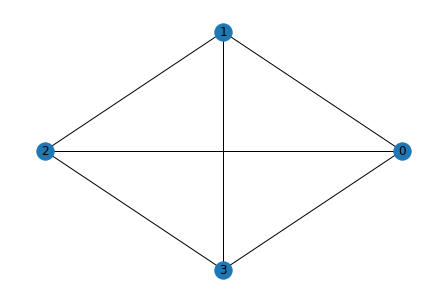

In [55]:
 # Create a 4-node complete graph
 G = nx.complete_graph(4)
 nx.draw_circular(G, with_labels=True)

In [56]:
# help(nx.clustering)

In [57]:
nx.clustering(G)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}

In [58]:
nx.average_clustering(G)

1.0

In [59]:
nx.clustering(kc_g)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [60]:
round(nx.average_clustering(kc_g),2)

0.57

# Weighted Undirected Graph - Support percent of two co-purchased depts

In [61]:
# help(nx.read_weighted_edgelist)

In [62]:
# Load a graph from a list of edges in a csv file
copur_sup_g = nx.read_weighted_edgelist('/content/drive/My Drive/Walmart_8_depts_support_edges.csv', delimiter =",")

In [63]:
copur_sup_g.name = 'Walmart Copurchase Department Support Graph'

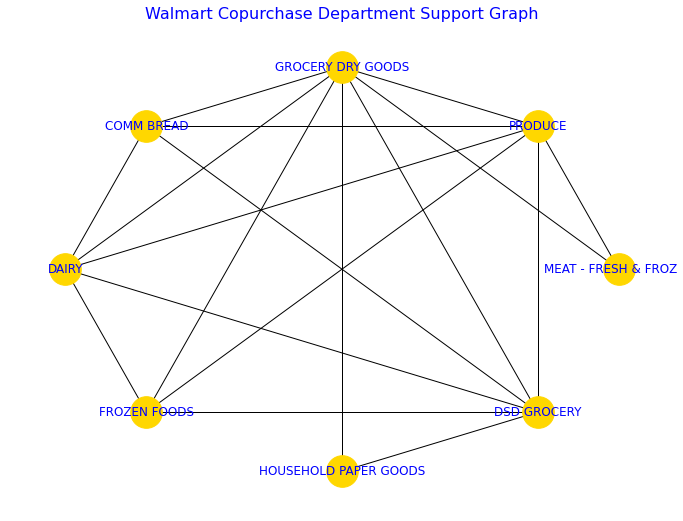

In [64]:
plt.figure(figsize =(12, 9)) 
plt.title(copur_sup_g.name, fontsize=16, color= 'b')
nx.draw_circular(copur_sup_g, with_labels = True, node_color='gold',node_size=1000, font_size=12,font_color = 'b')

In [65]:
print(nx.info(copur_sup_g))

Graph named 'Walmart Copurchase Department Support Graph' with 8 nodes and 18 edges


In [66]:
copur_sup_g.nodes

NodeView(('MEAT - FRESH & FROZEN', 'PRODUCE', 'GROCERY DRY GOODS', 'COMM BREAD', 'DAIRY', 'FROZEN FOODS', 'HOUSEHOLD PAPER GOODS', 'DSD GROCERY'))

In [67]:
copur_sup_g.edges

EdgeView([('MEAT - FRESH & FROZEN', 'PRODUCE'), ('MEAT - FRESH & FROZEN', 'GROCERY DRY GOODS'), ('PRODUCE', 'COMM BREAD'), ('PRODUCE', 'FROZEN FOODS'), ('PRODUCE', 'DAIRY'), ('PRODUCE', 'GROCERY DRY GOODS'), ('PRODUCE', 'DSD GROCERY'), ('GROCERY DRY GOODS', 'COMM BREAD'), ('GROCERY DRY GOODS', 'FROZEN FOODS'), ('GROCERY DRY GOODS', 'HOUSEHOLD PAPER GOODS'), ('GROCERY DRY GOODS', 'DAIRY'), ('GROCERY DRY GOODS', 'DSD GROCERY'), ('COMM BREAD', 'DAIRY'), ('COMM BREAD', 'DSD GROCERY'), ('DAIRY', 'FROZEN FOODS'), ('DAIRY', 'DSD GROCERY'), ('FROZEN FOODS', 'DSD GROCERY'), ('HOUSEHOLD PAPER GOODS', 'DSD GROCERY')])

## Get and use weights

In [68]:
print(copur_sup_g.edges.data('weight'))

[('MEAT - FRESH & FROZEN', 'PRODUCE', 0.047), ('MEAT - FRESH & FROZEN', 'GROCERY DRY GOODS', 0.046), ('PRODUCE', 'COMM BREAD', 0.0575), ('PRODUCE', 'FROZEN FOODS', 0.0525), ('PRODUCE', 'DAIRY', 0.098), ('PRODUCE', 'GROCERY DRY GOODS', 0.1035), ('PRODUCE', 'DSD GROCERY', 0.107), ('GROCERY DRY GOODS', 'COMM BREAD', 0.0765), ('GROCERY DRY GOODS', 'FROZEN FOODS', 0.0635), ('GROCERY DRY GOODS', 'HOUSEHOLD PAPER GOODS', 0.0565), ('GROCERY DRY GOODS', 'DAIRY', 0.117), ('GROCERY DRY GOODS', 'DSD GROCERY', 0.1305), ('COMM BREAD', 'DAIRY', 0.065), ('COMM BREAD', 'DSD GROCERY', 0.0735), ('DAIRY', 'FROZEN FOODS', 0.062), ('DAIRY', 'DSD GROCERY', 0.1225), ('FROZEN FOODS', 'DSD GROCERY', 0.0725), ('HOUSEHOLD PAPER GOODS', 'DSD GROCERY', 0.062)]


In [69]:
for (u, v, wt) in copur_sup_g.edges.data('weight'):
  print(f"({u}, {v}, {wt:.3})")

(MEAT - FRESH & FROZEN, PRODUCE, 0.047)
(MEAT - FRESH & FROZEN, GROCERY DRY GOODS, 0.046)
(PRODUCE, COMM BREAD, 0.0575)
(PRODUCE, FROZEN FOODS, 0.0525)
(PRODUCE, DAIRY, 0.098)
(PRODUCE, GROCERY DRY GOODS, 0.103)
(PRODUCE, DSD GROCERY, 0.107)
(GROCERY DRY GOODS, COMM BREAD, 0.0765)
(GROCERY DRY GOODS, FROZEN FOODS, 0.0635)
(GROCERY DRY GOODS, HOUSEHOLD PAPER GOODS, 0.0565)
(GROCERY DRY GOODS, DAIRY, 0.117)
(GROCERY DRY GOODS, DSD GROCERY, 0.131)
(COMM BREAD, DAIRY, 0.065)
(COMM BREAD, DSD GROCERY, 0.0735)
(DAIRY, FROZEN FOODS, 0.062)
(DAIRY, DSD GROCERY, 0.122)
(FROZEN FOODS, DSD GROCERY, 0.0725)
(HOUSEHOLD PAPER GOODS, DSD GROCERY, 0.062)


In [70]:
# adjacency matrix of a weighted graph shows weight values instead of zeros and ones
nx.adj_matrix(copur_sup_g).todense()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  


matrix([[0.    , 0.047 , 0.046 , 0.    , 0.    , 0.    , 0.    , 0.    ],
        [0.047 , 0.    , 0.1035, 0.0575, 0.098 , 0.0525, 0.    , 0.107 ],
        [0.046 , 0.1035, 0.    , 0.0765, 0.117 , 0.0635, 0.0565, 0.1305],
        [0.    , 0.0575, 0.0765, 0.    , 0.065 , 0.    , 0.    , 0.0735],
        [0.    , 0.098 , 0.117 , 0.065 , 0.    , 0.062 , 0.    , 0.1225],
        [0.    , 0.0525, 0.0635, 0.    , 0.062 , 0.    , 0.    , 0.0725],
        [0.    , 0.    , 0.0565, 0.    , 0.    , 0.    , 0.    , 0.062 ],
        [0.    , 0.107 , 0.1305, 0.0735, 0.1225, 0.0725, 0.062 , 0.    ]])

In [71]:
print("Node                      Degree\n")
for v in copur_sup_g.nodes:
    print(f'{v:25} {copur_sup_g.degree(v):6}')
# right-justified each column

Node                      Degree

MEAT - FRESH & FROZEN          2
PRODUCE                        6
GROCERY DRY GOODS              7
COMM BREAD                     4
DAIRY                          5
FROZEN FOODS                   4
HOUSEHOLD PAPER GOODS          2
DSD GROCERY                    6


In [72]:
nx.degree_histogram(copur_sup_g)

[0, 0, 2, 0, 2, 1, 2, 1]

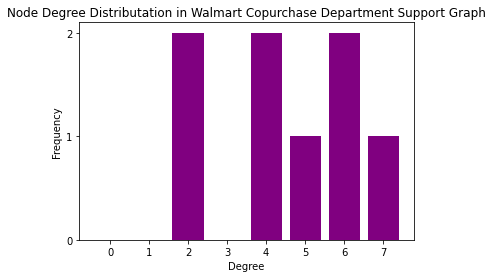

In [73]:
# Draw a bar graph of number of Node Degree Distribution
# create x and y values of each bar
y_axis = nx.degree_histogram(copur_sup_g)
x_axis = list(range(0,len(y_axis)))
# Draw bars using y_axis and x_axis
plt.bar(x_axis, y_axis, color = 'purple')
# draw tick labels
plt.xticks(x_axis)
plt.yticks(list(range(0,max(y_axis)+1)))
# Add title and axis names
plt.title(f'Node Degree Distributation in {copur_sup_g.name}')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

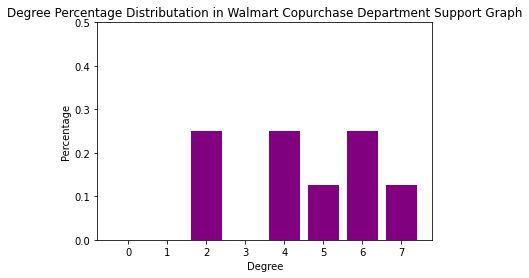

In [74]:
degrees = nx.degree_histogram(copur_sup_g)
y_axis =  [i/sum(degrees) for i in degrees]
# x_axis = list(range(0,len(y_axis)))
plt.bar(x_axis, y_axis, color = 'purple')
# Draw axis labels 
plt.xticks(x_axis)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5])
# Add title and axis names
plt.title(f'Degree Percentage Distributation in {copur_sup_g.name}')
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.ylim(0,0.5)
plt.show()

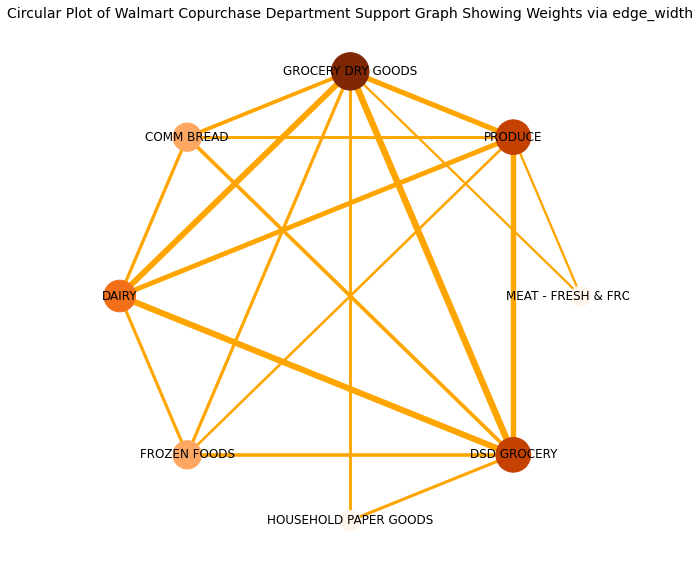

In [75]:
plt.figure(figsize=(10,10))
plt.title(f'Circular Plot of {copur_sup_g.name} Showing Weights via edge_width', fontsize = 14)
degree_color = [copur_sup_g.degree(v) for v in copur_sup_g]
degree_size = [200*copur_sup_g.degree(v) for v in copur_sup_g]
edge_width = [50*(copur_sup_g[u][v]['weight']) for u,v in copur_sup_g.edges]
nx.draw_circular(copur_sup_g, width=edge_width,edge_color = 'orange',node_color = degree_color , node_size = (degree_size), with_labels=True, cmap = plt.cm.Oranges)
plt.show()

In [76]:
nx.shortest_path(copur_sup_g)

{'COMM BREAD': {'COMM BREAD': ['COMM BREAD'],
  'DAIRY': ['COMM BREAD', 'DAIRY'],
  'DSD GROCERY': ['COMM BREAD', 'DSD GROCERY'],
  'FROZEN FOODS': ['COMM BREAD', 'GROCERY DRY GOODS', 'FROZEN FOODS'],
  'GROCERY DRY GOODS': ['COMM BREAD', 'GROCERY DRY GOODS'],
  'HOUSEHOLD PAPER GOODS': ['COMM BREAD',
   'GROCERY DRY GOODS',
   'HOUSEHOLD PAPER GOODS'],
  'MEAT - FRESH & FROZEN': ['COMM BREAD',
   'GROCERY DRY GOODS',
   'MEAT - FRESH & FROZEN'],
  'PRODUCE': ['COMM BREAD', 'PRODUCE']},
 'DAIRY': {'COMM BREAD': ['DAIRY', 'COMM BREAD'],
  'DAIRY': ['DAIRY'],
  'DSD GROCERY': ['DAIRY', 'DSD GROCERY'],
  'FROZEN FOODS': ['DAIRY', 'FROZEN FOODS'],
  'GROCERY DRY GOODS': ['DAIRY', 'GROCERY DRY GOODS'],
  'HOUSEHOLD PAPER GOODS': ['DAIRY',
   'GROCERY DRY GOODS',
   'HOUSEHOLD PAPER GOODS'],
  'MEAT - FRESH & FROZEN': ['DAIRY',
   'GROCERY DRY GOODS',
   'MEAT - FRESH & FROZEN'],
  'PRODUCE': ['DAIRY', 'PRODUCE']},
 'DSD GROCERY': {'COMM BREAD': ['DSD GROCERY', 'COMM BREAD'],
  'DAIRY': ['DS

In [77]:
path_ct = 0
sum_shortest_len = 0
for v1 in copur_sup_g.nodes:
  for v2 in copur_sup_g.nodes:
      if v1 != v2: 
        path_ct +=1
        sum_shortest_len +=nx.shortest_path_length(copur_sup_g,v1,v2)
        print(f"({v1}, {v2}, {nx.shortest_path_length(copur_sup_g,v1,v2)})")

(MEAT - FRESH & FROZEN, PRODUCE, 1)
(MEAT - FRESH & FROZEN, GROCERY DRY GOODS, 1)
(MEAT - FRESH & FROZEN, COMM BREAD, 2)
(MEAT - FRESH & FROZEN, DAIRY, 2)
(MEAT - FRESH & FROZEN, FROZEN FOODS, 2)
(MEAT - FRESH & FROZEN, HOUSEHOLD PAPER GOODS, 2)
(MEAT - FRESH & FROZEN, DSD GROCERY, 2)
(PRODUCE, MEAT - FRESH & FROZEN, 1)
(PRODUCE, GROCERY DRY GOODS, 1)
(PRODUCE, COMM BREAD, 1)
(PRODUCE, DAIRY, 1)
(PRODUCE, FROZEN FOODS, 1)
(PRODUCE, HOUSEHOLD PAPER GOODS, 2)
(PRODUCE, DSD GROCERY, 1)
(GROCERY DRY GOODS, MEAT - FRESH & FROZEN, 1)
(GROCERY DRY GOODS, PRODUCE, 1)
(GROCERY DRY GOODS, COMM BREAD, 1)
(GROCERY DRY GOODS, DAIRY, 1)
(GROCERY DRY GOODS, FROZEN FOODS, 1)
(GROCERY DRY GOODS, HOUSEHOLD PAPER GOODS, 1)
(GROCERY DRY GOODS, DSD GROCERY, 1)
(COMM BREAD, MEAT - FRESH & FROZEN, 2)
(COMM BREAD, PRODUCE, 1)
(COMM BREAD, GROCERY DRY GOODS, 1)
(COMM BREAD, DAIRY, 1)
(COMM BREAD, FROZEN FOODS, 2)
(COMM BREAD, HOUSEHOLD PAPER GOODS, 2)
(COMM BREAD, DSD GROCERY, 1)
(DAIRY, MEAT - FRESH & FROZEN,

In [78]:
print('average shortest path length = ', sum_shortest_len/path_ct)

average shortest path length =  1.3571428571428572


In [79]:
nx.average_shortest_path_length(copur_sup_g)

1.3571428571428572

In [80]:
nx.eccentricity(copur_sup_g)

{'COMM BREAD': 2,
 'DAIRY': 2,
 'DSD GROCERY': 2,
 'FROZEN FOODS': 2,
 'GROCERY DRY GOODS': 1,
 'HOUSEHOLD PAPER GOODS': 2,
 'MEAT - FRESH & FROZEN': 2,
 'PRODUCE': 2}

In [81]:
nx.diameter(copur_sup_g)

2

In [82]:
nx.radius(copur_sup_g)

1

In [83]:
nx.periphery(copur_sup_g)

['MEAT - FRESH & FROZEN',
 'PRODUCE',
 'COMM BREAD',
 'DAIRY',
 'FROZEN FOODS',
 'HOUSEHOLD PAPER GOODS',
 'DSD GROCERY']

In [84]:
nx.center(copur_sup_g)

['GROCERY DRY GOODS']

In [85]:
nx.clustering(copur_sup_g)

{'COMM BREAD': 1.0,
 'DAIRY': 0.9,
 'DSD GROCERY': 0.6666666666666666,
 'FROZEN FOODS': 1.0,
 'GROCERY DRY GOODS': 0.5238095238095238,
 'HOUSEHOLD PAPER GOODS': 1.0,
 'MEAT - FRESH & FROZEN': 1.0,
 'PRODUCE': 0.6666666666666666}

In [86]:
nx.average_clustering(copur_sup_g)

0.8446428571428571

# Directed Graph - Confidence of two co-purchased depts

In [87]:
# Load a graph from an input csv file
copur_conf_g = nx.read_weighted_edgelist('/content/drive/My Drive/Walmart_8_depts_confidence_edges.csv', delimiter =",",create_using=nx.DiGraph)

In [88]:
copur_conf_g.name = 'Walmart Copurchase Department Confidence Graph'

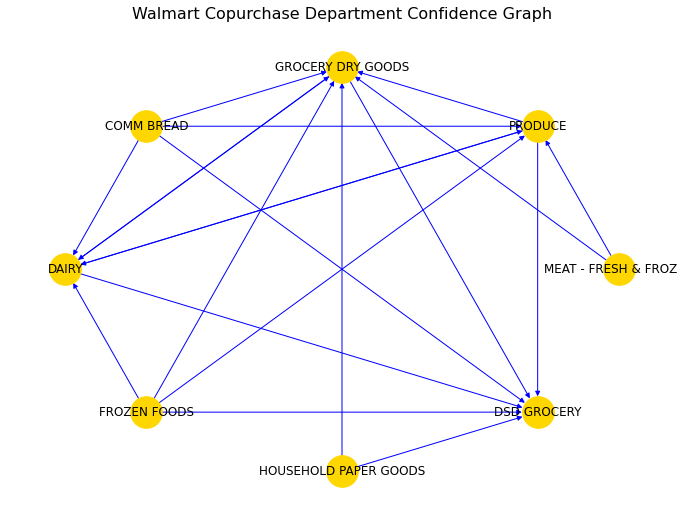

In [89]:
# g_layout = nx.circular_layout(copur_conf_g)
plt.figure(figsize =(12, 9)) 
plt.title(copur_conf_g.name, fontsize=16)
nx.draw_circular(copur_conf_g, with_labels = True, node_color='gold',node_size=1000, font_size=12, edge_color = 'b')

In [90]:
print(nx.info(copur_conf_g))

DiGraph named 'Walmart Copurchase Department Confidence Graph' with 8 nodes and 20 edges


In [91]:
copur_conf_g.nodes

NodeView(('MEAT - FRESH & FROZEN', 'PRODUCE', 'GROCERY DRY GOODS', 'COMM BREAD', 'DAIRY', 'FROZEN FOODS', 'HOUSEHOLD PAPER GOODS', 'DSD GROCERY'))

In [92]:
copur_conf_g.edges

OutEdgeView([('MEAT - FRESH & FROZEN', 'PRODUCE'), ('MEAT - FRESH & FROZEN', 'GROCERY DRY GOODS'), ('PRODUCE', 'DAIRY'), ('PRODUCE', 'GROCERY DRY GOODS'), ('PRODUCE', 'DSD GROCERY'), ('GROCERY DRY GOODS', 'DAIRY'), ('GROCERY DRY GOODS', 'DSD GROCERY'), ('COMM BREAD', 'GROCERY DRY GOODS'), ('COMM BREAD', 'DAIRY'), ('COMM BREAD', 'PRODUCE'), ('COMM BREAD', 'DSD GROCERY'), ('DAIRY', 'GROCERY DRY GOODS'), ('DAIRY', 'PRODUCE'), ('DAIRY', 'DSD GROCERY'), ('FROZEN FOODS', 'DAIRY'), ('FROZEN FOODS', 'GROCERY DRY GOODS'), ('FROZEN FOODS', 'PRODUCE'), ('FROZEN FOODS', 'DSD GROCERY'), ('HOUSEHOLD PAPER GOODS', 'GROCERY DRY GOODS'), ('HOUSEHOLD PAPER GOODS', 'DSD GROCERY')])

In [93]:
for (u, v, wt) in copur_conf_g.edges.data('weight'):
  print(f"({u}, {v}, {wt:.3})")

(MEAT - FRESH & FROZEN, PRODUCE, 0.752)
(MEAT - FRESH & FROZEN, GROCERY DRY GOODS, 0.736)
(PRODUCE, DAIRY, 0.508)
(PRODUCE, GROCERY DRY GOODS, 0.536)
(PRODUCE, DSD GROCERY, 0.554)
(GROCERY DRY GOODS, DAIRY, 0.54)
(GROCERY DRY GOODS, DSD GROCERY, 0.603)
(COMM BREAD, GROCERY DRY GOODS, 0.729)
(COMM BREAD, DAIRY, 0.619)
(COMM BREAD, PRODUCE, 0.548)
(COMM BREAD, DSD GROCERY, 0.7)
(DAIRY, GROCERY DRY GOODS, 0.609)
(DAIRY, PRODUCE, 0.51)
(DAIRY, DSD GROCERY, 0.638)
(FROZEN FOODS, DAIRY, 0.611)
(FROZEN FOODS, GROCERY DRY GOODS, 0.626)
(FROZEN FOODS, PRODUCE, 0.517)
(FROZEN FOODS, DSD GROCERY, 0.714)
(HOUSEHOLD PAPER GOODS, GROCERY DRY GOODS, 0.614)
(HOUSEHOLD PAPER GOODS, DSD GROCERY, 0.674)


In [94]:
nx.adj_matrix(copur_conf_g).todense()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  """Entry point for launching an IPython kernel.


matrix([[0.   , 0.752, 0.736, 0.   , 0.   , 0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.536, 0.   , 0.508, 0.   , 0.   , 0.554],
        [0.   , 0.   , 0.   , 0.   , 0.54 , 0.   , 0.   , 0.603],
        [0.   , 0.548, 0.729, 0.   , 0.619, 0.   , 0.   , 0.7  ],
        [0.   , 0.51 , 0.609, 0.   , 0.   , 0.   , 0.   , 0.638],
        [0.   , 0.517, 0.626, 0.   , 0.611, 0.   , 0.   , 0.714],
        [0.   , 0.   , 0.614, 0.   , 0.   , 0.   , 0.   , 0.674],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ]])

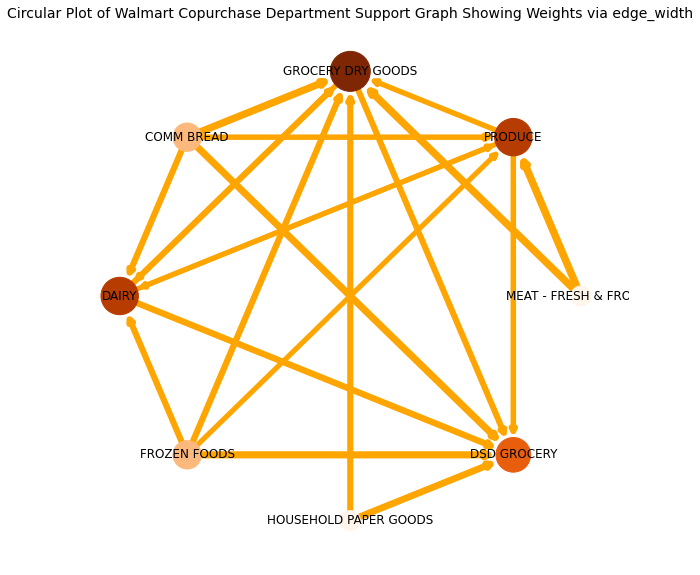

In [95]:
plt.figure(figsize=(10,10))
plt.title(f'Circular Plot of {copur_sup_g.name} Showing Weights via edge_width', fontsize = 14)
degree_color = [copur_conf_g.degree(v) for v in copur_conf_g]
degree_size = [200*copur_conf_g.degree(v) for v in copur_conf_g]
edge_width = [10*(copur_conf_g[u][v]['weight']) for u,v in copur_conf_g.edges]
nx.draw_circular(copur_conf_g, width=edge_width,edge_color = 'orange',node_color = degree_color , node_size = (degree_size), with_labels=True, cmap = plt.cm.Oranges)
plt.show()

In [96]:
print("Node                      OutDegree InDegree Degree\n")
for v in copur_sup_g.nodes:
    print(f'{v:26}{copur_conf_g.out_degree(v):9}{copur_conf_g.in_degree(v):9}{copur_conf_g.degree(v):7}')
# right-justified each column

Node                      OutDegree InDegree Degree

MEAT - FRESH & FROZEN             2        0      2
PRODUCE                           3        4      7
GROCERY DRY GOODS                 2        6      8
COMM BREAD                        4        0      4
DAIRY                             3        4      7
FROZEN FOODS                      4        0      4
HOUSEHOLD PAPER GOODS             2        0      2
DSD GROCERY                       0        6      6


In [97]:
nx.degree_histogram(copur_conf_g)
# The same as copur_sup_g. No existing functions to generate distribution of in and out degrees.

[0, 0, 2, 0, 2, 0, 1, 2, 1]

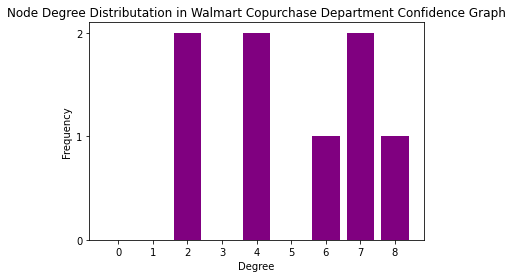

In [98]:
# Draw a bar graph of number of Node Degree Distribution
# create x and y values of each bar
y_axis = nx.degree_histogram(copur_conf_g)
x_axis = list(range(0,len(y_axis)))
# Draw bars using y_axis and x_axis
plt.bar(x_axis, y_axis, color = 'purple')
# draw tick labels
plt.xticks(x_axis)
plt.yticks(list(range(0,max(y_axis)+1)))
# Add title and axis names
plt.title(f'Node Degree Distributation in {copur_conf_g.name}')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

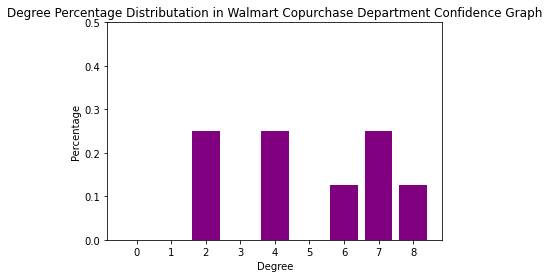

In [99]:
degrees = nx.degree_histogram(copur_conf_g)
y_axis =  [i/sum(degrees) for i in degrees]
# x_axis = list(range(0,len(y_axis)))
plt.bar(x_axis, y_axis, color = 'purple')
# Draw axis labels 
plt.xticks(x_axis)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5])
# Add title and axis names
plt.title(f'Degree Percentage Distributation in {copur_conf_g.name}')
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.ylim(0,0.5)
plt.show()

In [100]:
nx.shortest_path(copur_conf_g)

{'COMM BREAD': {'COMM BREAD': ['COMM BREAD'],
  'DAIRY': ['COMM BREAD', 'DAIRY'],
  'DSD GROCERY': ['COMM BREAD', 'DSD GROCERY'],
  'GROCERY DRY GOODS': ['COMM BREAD', 'GROCERY DRY GOODS'],
  'PRODUCE': ['COMM BREAD', 'PRODUCE']},
 'DAIRY': {'DAIRY': ['DAIRY'],
  'DSD GROCERY': ['DAIRY', 'DSD GROCERY'],
  'GROCERY DRY GOODS': ['DAIRY', 'GROCERY DRY GOODS'],
  'PRODUCE': ['DAIRY', 'PRODUCE']},
 'DSD GROCERY': {'DSD GROCERY': ['DSD GROCERY']},
 'FROZEN FOODS': {'DAIRY': ['FROZEN FOODS', 'DAIRY'],
  'DSD GROCERY': ['FROZEN FOODS', 'DSD GROCERY'],
  'FROZEN FOODS': ['FROZEN FOODS'],
  'GROCERY DRY GOODS': ['FROZEN FOODS', 'GROCERY DRY GOODS'],
  'PRODUCE': ['FROZEN FOODS', 'PRODUCE']},
 'GROCERY DRY GOODS': {'DAIRY': ['GROCERY DRY GOODS', 'DAIRY'],
  'DSD GROCERY': ['GROCERY DRY GOODS', 'DSD GROCERY'],
  'GROCERY DRY GOODS': ['GROCERY DRY GOODS'],
  'PRODUCE': ['GROCERY DRY GOODS', 'DAIRY', 'PRODUCE']},
 'HOUSEHOLD PAPER GOODS': {'DAIRY': ['HOUSEHOLD PAPER GOODS',
   'GROCERY DRY GOODS',
 

In [101]:
nx.shortest_path(copur_conf_g,source='MEAT - FRESH & FROZEN')

{'DAIRY': ['MEAT - FRESH & FROZEN', 'PRODUCE', 'DAIRY'],
 'DSD GROCERY': ['MEAT - FRESH & FROZEN', 'PRODUCE', 'DSD GROCERY'],
 'GROCERY DRY GOODS': ['MEAT - FRESH & FROZEN', 'GROCERY DRY GOODS'],
 'MEAT - FRESH & FROZEN': ['MEAT - FRESH & FROZEN'],
 'PRODUCE': ['MEAT - FRESH & FROZEN', 'PRODUCE']}

In [102]:
nx.shortest_path_length(copur_conf_g,'MEAT - FRESH & FROZEN', 'PRODUCE')

1

In [103]:
nx.shortest_path(copur_conf_g,source='DAIRY')

{'DAIRY': ['DAIRY'],
 'DSD GROCERY': ['DAIRY', 'DSD GROCERY'],
 'GROCERY DRY GOODS': ['DAIRY', 'GROCERY DRY GOODS'],
 'PRODUCE': ['DAIRY', 'PRODUCE']}

In [104]:
nx.shortest_path(copur_conf_g,target='DAIRY')

{'COMM BREAD': ['COMM BREAD', 'DAIRY'],
 'DAIRY': ['DAIRY'],
 'FROZEN FOODS': ['FROZEN FOODS', 'DAIRY'],
 'GROCERY DRY GOODS': ['GROCERY DRY GOODS', 'DAIRY'],
 'HOUSEHOLD PAPER GOODS': ['HOUSEHOLD PAPER GOODS',
  'GROCERY DRY GOODS',
  'DAIRY'],
 'MEAT - FRESH & FROZEN': ['MEAT - FRESH & FROZEN',
  'GROCERY DRY GOODS',
  'DAIRY'],
 'PRODUCE': ['PRODUCE', 'DAIRY']}

In [105]:
nx.average_shortest_path_length(copur_conf_g)

0.5535714285714286

## diameter, radius, eccentricity, periphery, center are not available for non-strongly-connected graph

Ref: https://en.wikipedia.org/wiki/Strongly_connected_component

In [106]:
nx.is_strongly_connected(copur_conf_g)

False

In [107]:
nx.clustering(copur_conf_g)

{'COMM BREAD': 0.6666666666666666,
 'DAIRY': 0.47368421052631576,
 'DSD GROCERY': 0.4,
 'FROZEN FOODS': 0.6666666666666666,
 'GROCERY DRY GOODS': 0.3148148148148148,
 'HOUSEHOLD PAPER GOODS': 0.5,
 'MEAT - FRESH & FROZEN': 0.5,
 'PRODUCE': 0.4}

In [108]:
nx.average_clustering(copur_conf_g)

0.49022904483430796

# Facebook Example - Undirected, Unweighted

## Add attributes to nodes

In [109]:
FBGraph = nx.read_weighted_edgelist('/content/drive/My Drive//FacebookEdges_limited_A7S2.csv', delimiter =",") 
FBGraph.name = 'Facebook Graph of Randomly Sampled Users'

In [110]:
print(nx.info(FBGraph))

Graph named 'Facebook Graph of Randomly Sampled Users' with 99 nodes and 211 edges


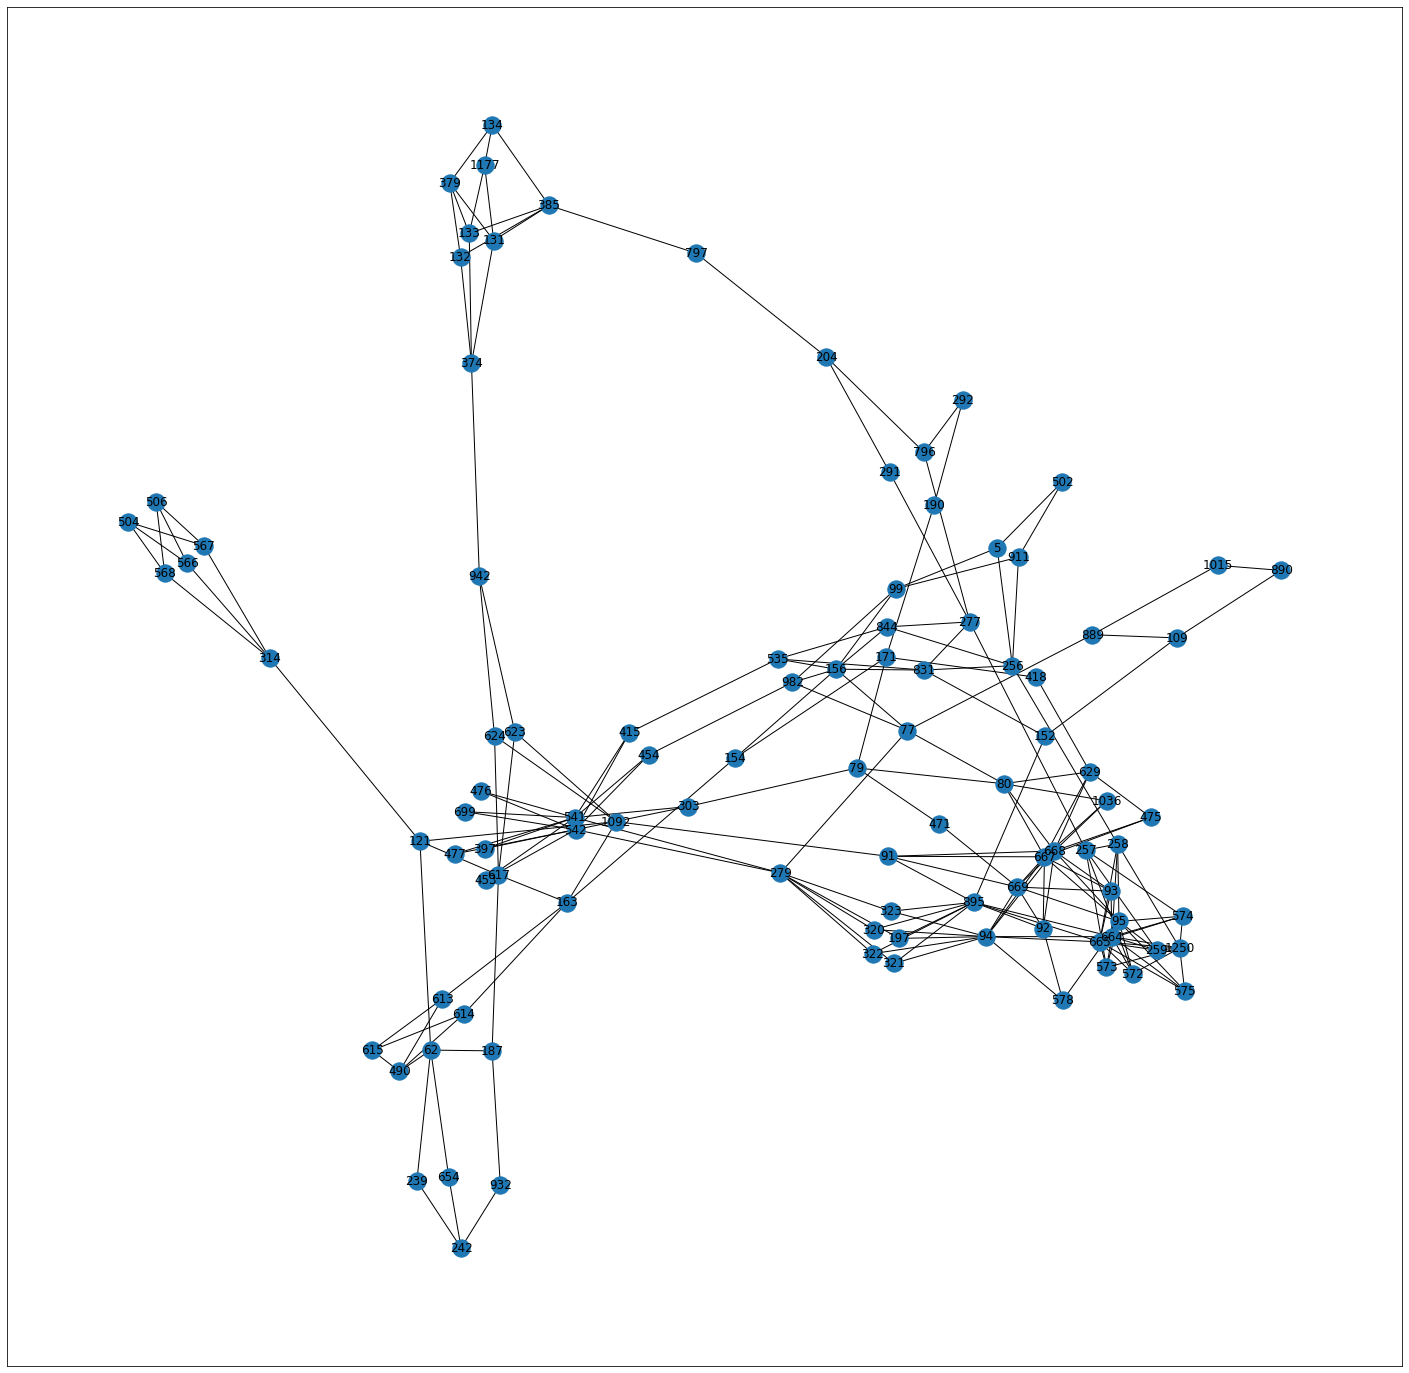

In [111]:
plt.figure(figsize=(25,25))
# g_layout = nx.kamada_kawai_layout(FBGraph)
# nx.draw_networkx(FBGraph,g_layout, with_labels = True)
# nx.draw_circular(FBGraph, with_labels = True, font_size=14)
nx.draw_networkx(FBGraph, with_labels = True)
# plt.axis('off')
# plt.tight_layout()
plt.show()

In [112]:
with open('/content/drive/My Drive/FacebookNodes_limited_A7S2.csv') as csvfile:
    nodereader = csv.reader(csvfile, delimiter=',')
    for row in nodereader:
        if(row[0] in FBGraph.nodes):
          FBGraph.nodes[row[0]]['name'] = row[1]
          FBGraph.nodes[row[0]]['gender'] = row[2]
          FBGraph.nodes[row[0]]['age'] = int(row[3])
          FBGraph.nodes[row[0]]['country'] = row[4]

In [113]:
FBGraph.nodes.data('gender')

NodeDataView({'99': 'Male', '5': 'Female', '982': 'Male', '911': 'Female', '156': 'Male', '502': 'Male', '256': 'Male', '292': 'Female', '796': 'Female', '190': 'Male', '797': 'Female', '385': 'Female', '204': 'Male', '277': 'Female', '291': 'Male', '397': 'Male', '542': 'Female', '541': 'Male', '77': 'Female', '454': 'Male', '889': 'Male', '80': 'Male', '279': 'Male', '844': 'Female', '831': 'Male', '535': 'Male', '154': 'Male', '95': 'Male', '669': 'Male', '668': 'Male', '667': 'Female', '665': 'Female', '664': 'Female', '578': 'Female', '575': 'Male', '574': 'Female', '573': 'Female', '572': 'Male', '259': 'Female', '258': 'Male', '94': 'Male', '323': 'Female', '322': 'Female', '321': 'Female', '320': 'Female', '197': 'Male', '477': 'Female', '942': 'Female', '624': 'Male', '623': 'Male', '374': 'Female', '617': 'Male', '1092': 'Female', '133': 'Female', '132': 'Female', '131': 'Male', '93': 'Female', '654': 'Female', '62': 'Male', '242': 'Female', '932': 'Female', '239': 'Female', 

In [114]:
FB_name_Graph = nx.relabel_nodes(FBGraph, nx.get_node_attributes(FBGraph, 'name'))

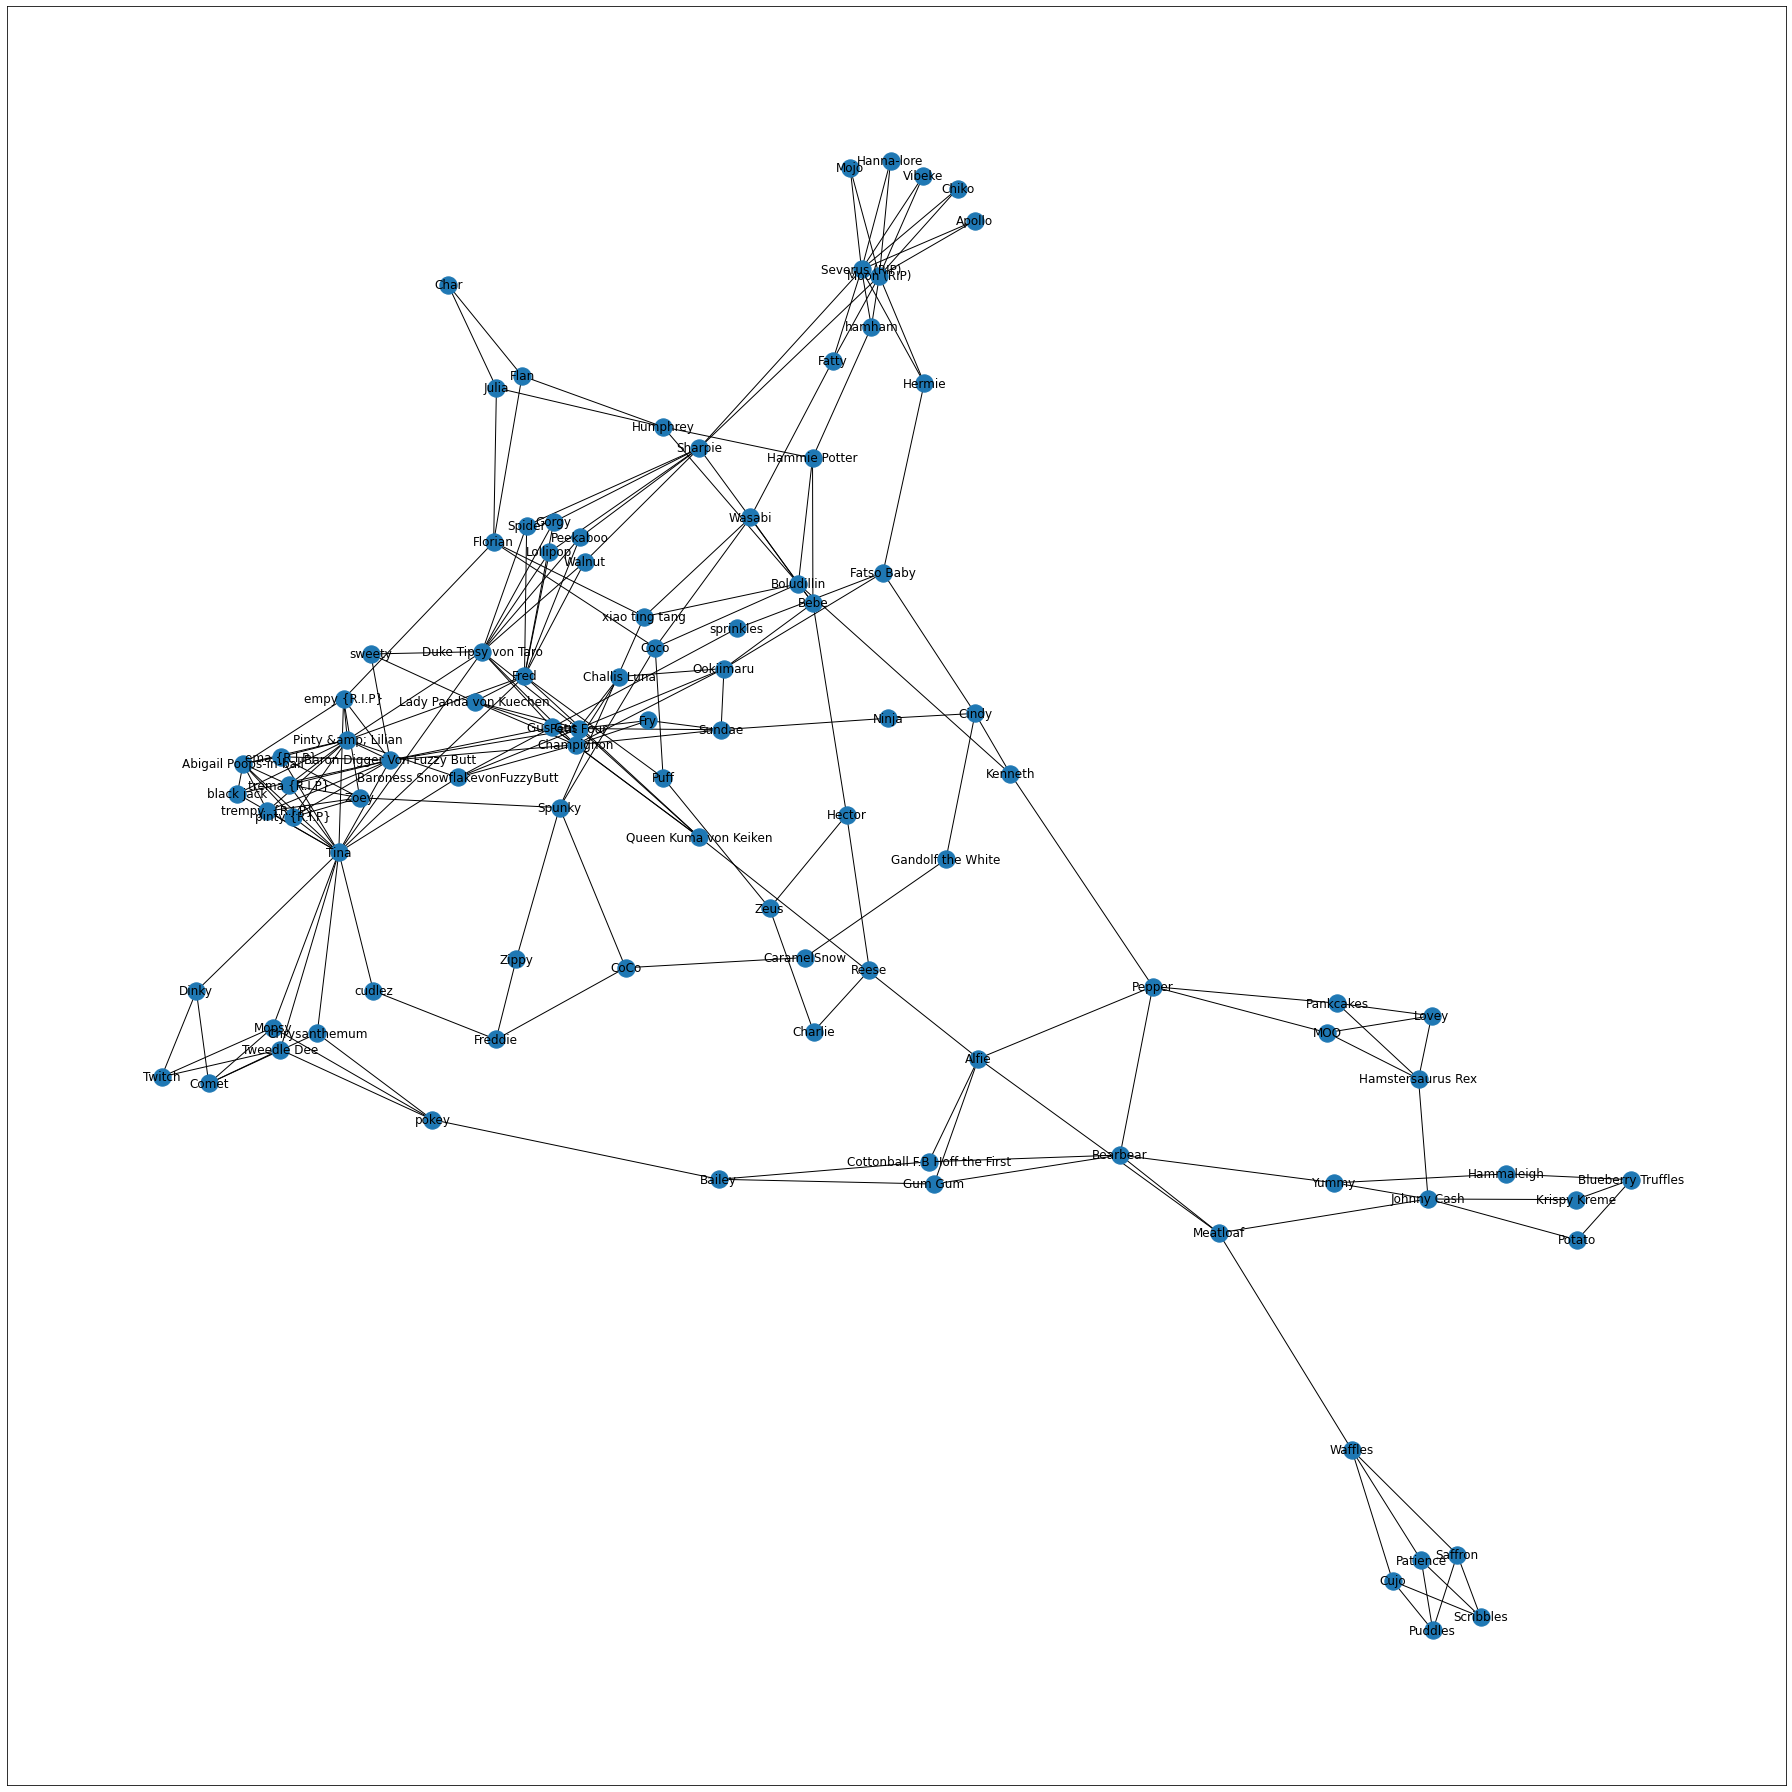

In [115]:
plt.figure(figsize=(25,25))
nx.draw_networkx(FB_name_Graph, with_labels = True)
# plt.axis('off')
plt.tight_layout()
plt.show()

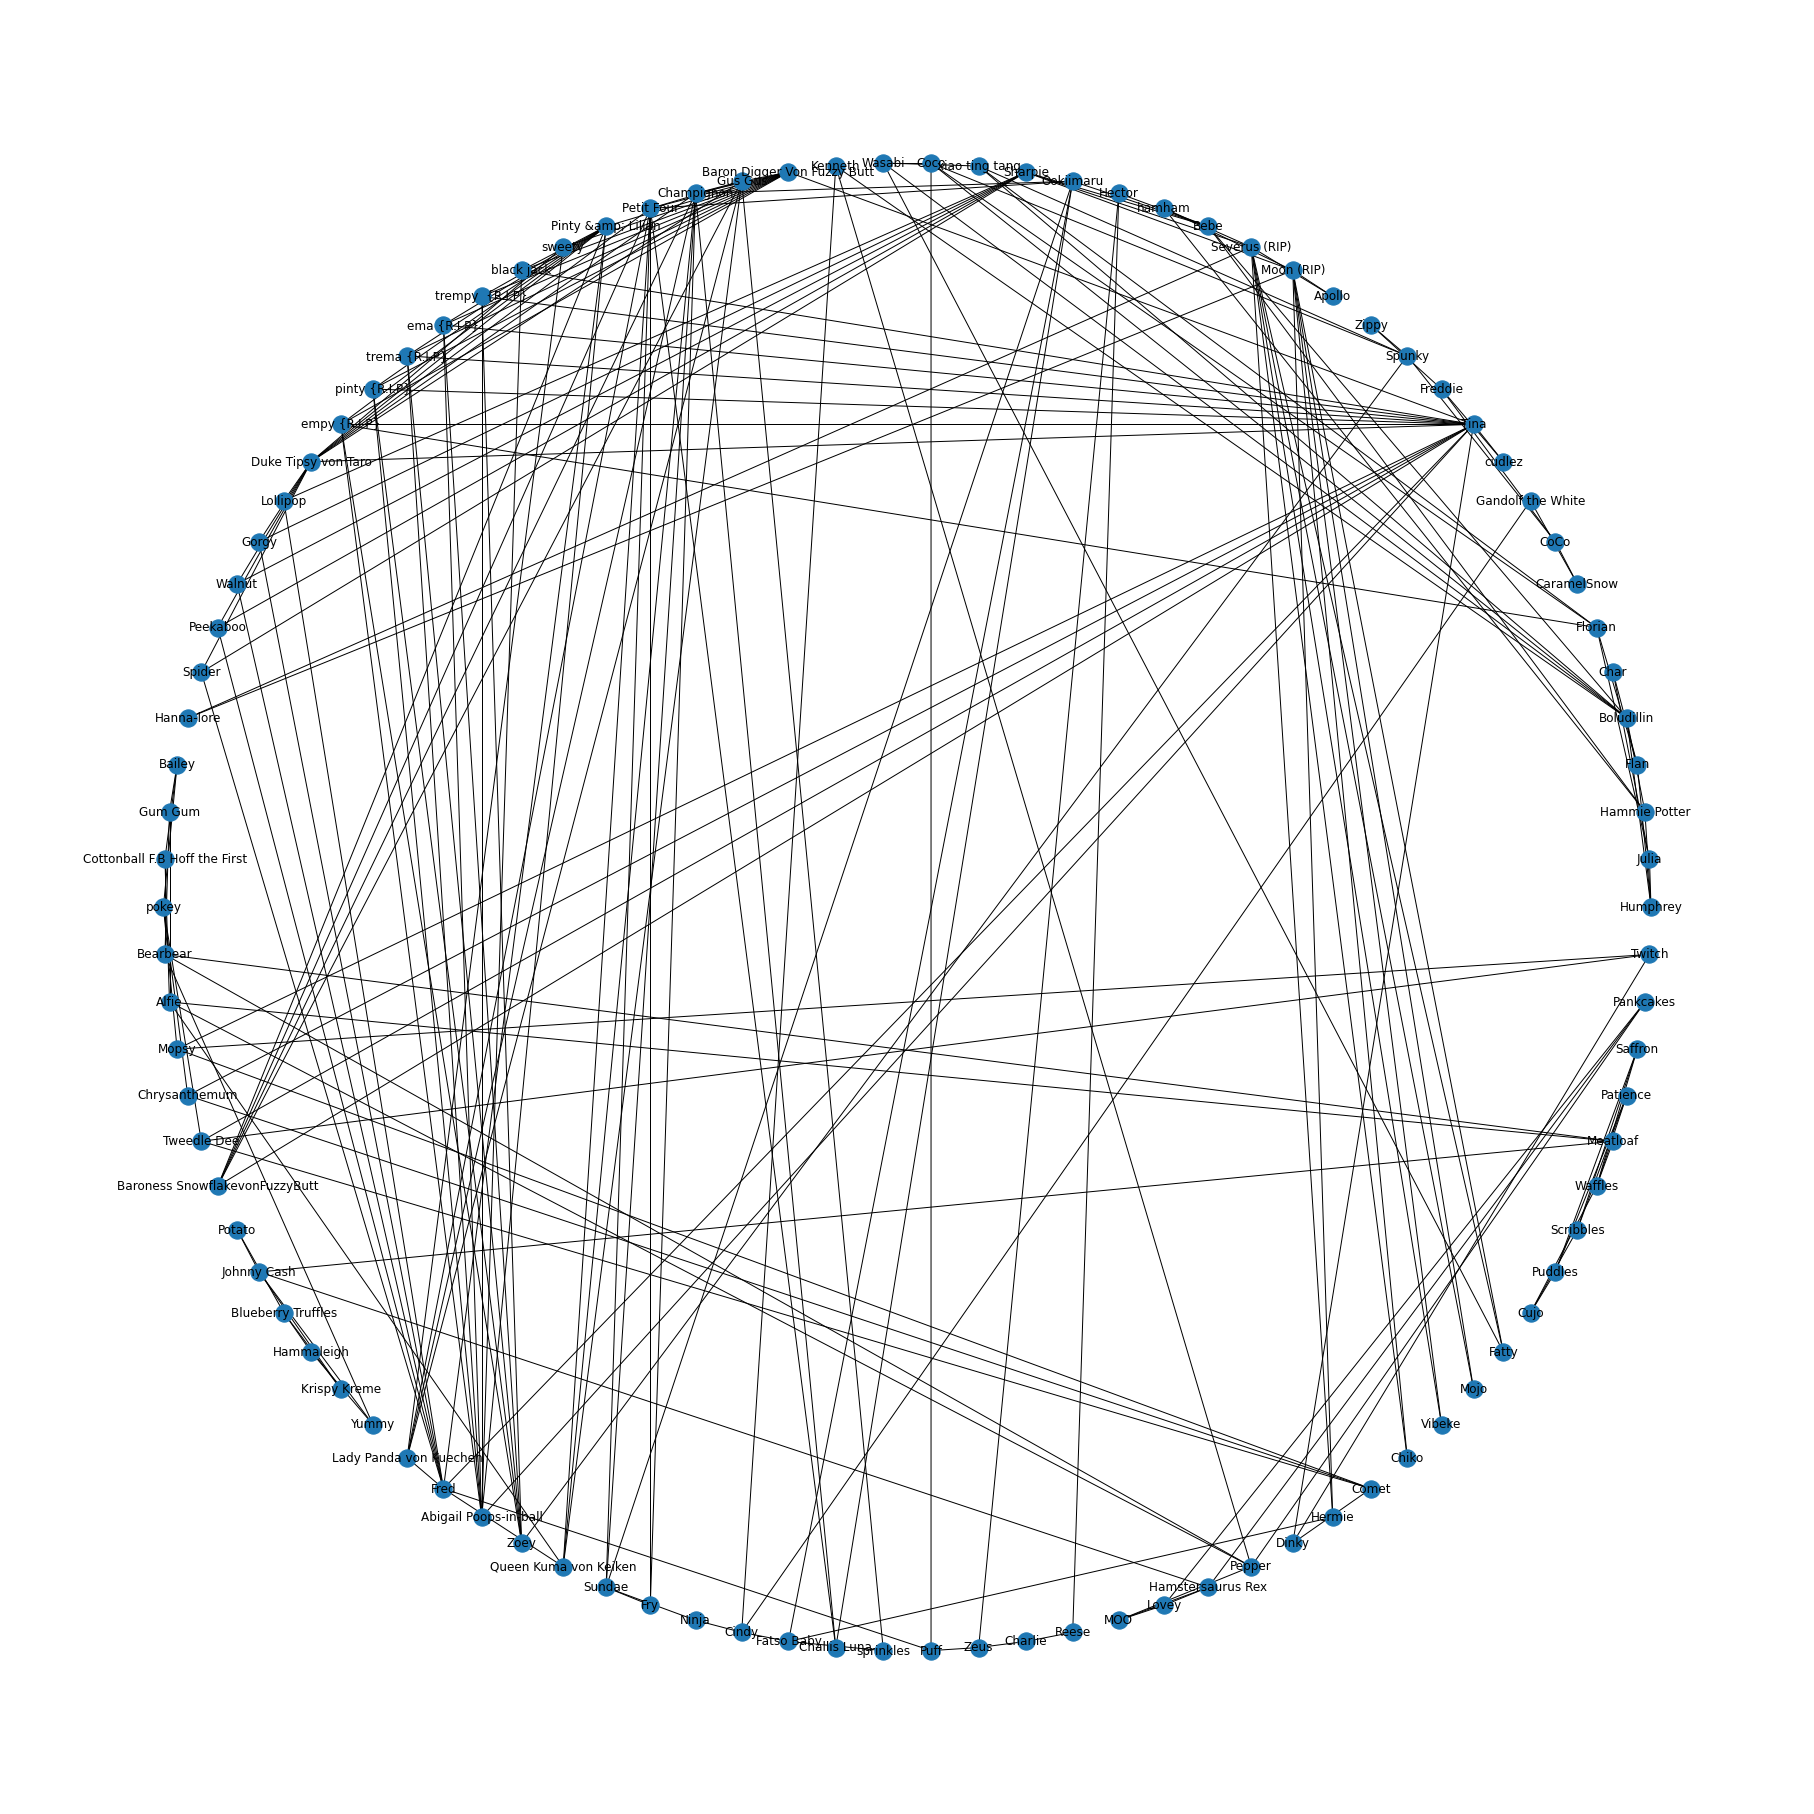

In [116]:
plt.figure(figsize=(25,25))
nx.draw_circular(FB_name_Graph, with_labels = True)
# plt.axis('off')
# plt.tight_layout()
plt.show()

In [117]:
print(nx.info(FB_name_Graph))
# As we will see later, FB_name_Graph collapsed different nodes with the same names in FBGraph 
# To avoid loss of information, we continue to use FBGraph

Graph named 'Facebook Graph of Randomly Sampled Users' with 98 nodes and 211 edges


## Color the nodes by the country attribute

In [118]:
# Use set to get unique countries only
set(nx.get_node_attributes(FBGraph, 'country').values())

{'Belgium',
 'Canada',
 'Costa Rica',
 'Germany',
 'Japan',
 'Mexico',
 'Now Coalinga',
 'Philippines',
 'Poland',
 'Singapore',
 'United Kingdom',
 'United States'}

In [119]:
colorMap = {'Belgium':'black', 'Germany':'gold','Canada':'r', 'Costa Rica':'brown','Japan':'maroon', 'Now Coalinga':'purple',
           'Mexico':'olive','Philippines':'blue','Poland':'yellow','Singapore':'orange', 'United Kingdom':'green', 'United States':'royalblue'}

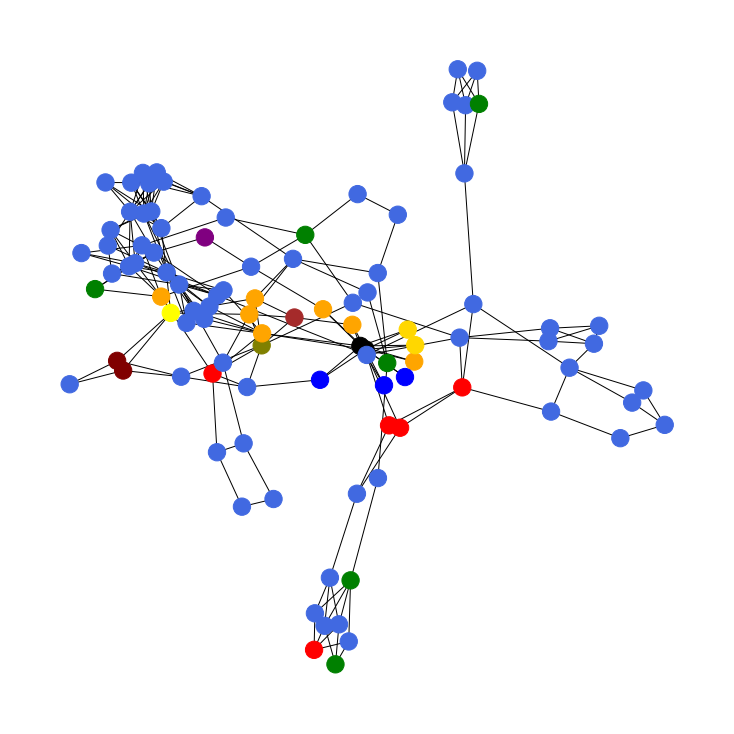

In [120]:
node_color = [colorMap[FBGraph.nodes[v]['country']] for v in FBGraph.nodes()] 

plt.figure(figsize=(10,10))
nx.draw(FBGraph, with_labels = False, node_color=node_color)

In [121]:
nx.adj_matrix(FBGraph).todense()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: adj_matrix is deprecated and will be removed in version 3.0.
Use `adjacency_matrix` instead

  """Entry point for launching an IPython kernel.


matrix([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

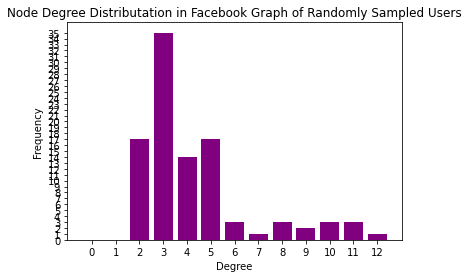

In [122]:
# Draw a bar graph of number of Node Degree Distribution
# create x and y values of each bar
y_axis = nx.degree_histogram(FBGraph)
x_axis = list(range(0,len(y_axis)))
# Draw bars using y_axis and x_axis
plt.bar(x_axis, y_axis, color = 'purple')
# draw tick labels
plt.xticks(x_axis)
plt.yticks(list(range(0,max(y_axis)+1)))
# Add title and axis names
plt.title(f'Node Degree Distributation in {FBGraph.name}')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

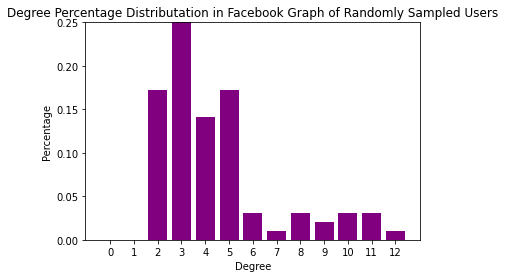

In [123]:
degrees = nx.degree_histogram(FBGraph)
y_axis =  [i/sum(degrees) for i in degrees]
# x_axis = list(range(0,len(y_axis)))
plt.bar(x_axis, y_axis, color = 'purple')
# Draw axis labels 
plt.xticks(x_axis)
plt.yticks([0.00,0.05,0.10,0.15,0.20,0.25])
# Add title and axis names
plt.title(f'Degree Percentage Distributation in {FBGraph.name}')
plt.xlabel('Degree')
plt.ylabel('Percentage')
plt.ylim(0,0.25)
plt.show()

In [124]:
nx.shortest_path(FBGraph,'99','163')

['99', '156', '154', '163']

In [125]:
nx.shortest_path(FBGraph,'99','471')

['99', '982', '77', '80', '79', '471']

In [126]:
nx.shortest_path_length(FBGraph,source='99')

{'1015': 4,
 '1036': 4,
 '109': 4,
 '1092': 4,
 '1177': 9,
 '121': 5,
 '1250': 4,
 '131': 8,
 '132': 8,
 '133': 8,
 '134': 8,
 '152': 3,
 '154': 2,
 '156': 1,
 '163': 3,
 '171': 3,
 '187': 5,
 '190': 4,
 '197': 4,
 '204': 5,
 '239': 7,
 '242': 7,
 '256': 2,
 '257': 4,
 '258': 3,
 '259': 5,
 '277': 3,
 '279': 3,
 '291': 4,
 '292': 5,
 '303': 4,
 '314': 6,
 '320': 4,
 '321': 4,
 '322': 4,
 '323': 4,
 '374': 7,
 '379': 9,
 '385': 7,
 '397': 4,
 '415': 3,
 '418': 4,
 '453': 4,
 '454': 2,
 '471': 5,
 '475': 5,
 '476': 4,
 '477': 4,
 '490': 5,
 '5': 1,
 '502': 2,
 '504': 8,
 '506': 8,
 '535': 2,
 '541': 3,
 '542': 3,
 '566': 7,
 '567': 7,
 '568': 7,
 '572': 5,
 '573': 5,
 '574': 5,
 '575': 5,
 '578': 5,
 '613': 4,
 '614': 4,
 '615': 5,
 '617': 4,
 '62': 6,
 '623': 5,
 '624': 5,
 '629': 4,
 '654': 7,
 '664': 4,
 '665': 4,
 '667': 4,
 '668': 4,
 '669': 5,
 '699': 4,
 '77': 2,
 '79': 4,
 '796': 4,
 '797': 6,
 '80': 3,
 '831': 2,
 '844': 2,
 '889': 3,
 '890': 5,
 '895': 4,
 '91': 5,
 '911': 1,
 

In [127]:
nx.average_shortest_path_length(FBGraph)

4.957946815089672

In [128]:
nx.diameter(FBGraph)

11

In [129]:
nx.radius(FBGraph)

7

In [130]:
nx.periphery(FBGraph)

['204', '397', '477', '1015', '379', '699', '476', '453', '506', '504', '1177']

In [131]:
nx.center(FBGraph)

['624', '623', '617', '1092', '91', '163']

In [132]:
nx.average_clustering(FBGraph)

0.10117772238984363

## Create a pandas dataframe of nodal information

In [133]:
df = pd.DataFrame(index=FBGraph.nodes())
df['name'] = pd.Series(nx.get_node_attributes(FBGraph, 'name'))
df['gender'] = pd.Series(nx.get_node_attributes(FBGraph, 'gender'))
df['age'] = pd.Series(nx.get_node_attributes(FBGraph, 'age'))
df['country'] = pd.Series(nx.get_node_attributes(FBGraph, 'country'))
df['degree'] = pd.Series(dict(FBGraph.degree()))
df['eccentricity'] =  pd.Series(nx.eccentricity(FBGraph))
df['clustering'] =  pd.Series(nx.clustering(FBGraph))

df.head(20)

name  gender  age  ... degree  eccentricity  clustering
99            Humphrey    Male   25  ...      4             9    0.166667
5                Julia  Female   27  ...      3             9    0.000000
982      Hammie Potter    Male   25  ...      4             9    0.333333
911               Flan  Female   26  ...      3             9    0.000000
156         Boludillin    Male   26  ...      7             8    0.190476
502               Char    Male   25  ...      2            10    0.000000
256            Florian    Male   26  ...      5             9    0.000000
292        CaramelSnow  Female   25  ...      2             9    0.000000
796               CoCo  Female   24  ...      3            10    0.000000
190  Gandolf the White    Male   24  ...      2             8    0.000000
797             cudlez  Female   24  ...      2            10    0.000000
385               Tina  Female   36  ...      5             9    0.000000
204            Freddie    Male   25  ...      3            11    0.000000
277             Spunky  Female   25  ...      5             9    0.000000
291              Zippy    Male   24  ...      2            10    0.000000
397             Apollo    Male   22  ...      2            11    0.000000
542         Moon (RIP)  Female   23  ...      9            10    0.000000
541      Severus (RIP)    Male   22  ...      9            10    0.000000
77                Bebe  Female   27  ...      5             9    0.100000
454             hamham    Male   23  ...      3            10    0.000000

[20 rows x 7 columns]

In [134]:
# Create another data frame from FB_name_Graph for comparison
df1 = pd.DataFrame(index=FB_name_Graph.nodes())
df1['name'] = pd.Series(nx.get_node_attributes(FB_name_Graph, 'name'))
df1['gender'] = pd.Series(nx.get_node_attributes(FB_name_Graph, 'gender'))
df1['age'] = pd.Series(nx.get_node_attributes(FB_name_Graph, 'age'))
df1['country'] = pd.Series(nx.get_node_attributes(FB_name_Graph, 'country'))
df1['degree'] = pd.Series(dict(FB_name_Graph.degree()))
df1['eccentricity'] =  pd.Series(nx.eccentricity(FB_name_Graph))
df1['clustering'] =  pd.Series(nx.clustering(FB_name_Graph))
df1

name  gender  age  ... degree  eccentricity  clustering
Humphrey            Humphrey    Male   25  ...      4             8    0.166667
Julia                  Julia  Female   27  ...      3             9    0.000000
Hammie Potter  Hammie Potter    Male   25  ...      4             8    0.333333
Flan                    Flan  Female   26  ...      3             9    0.000000
Boludillin        Boludillin    Male   26  ...      7             7    0.190476
...                      ...     ...  ...  ...    ...           ...         ...
Meatloaf            Meatloaf  Female   25  ...      4             7    0.000000
Patience            Patience  Female   25  ...      3             9    0.000000
Saffron              Saffron  Female   25  ...      3             9    0.000000
Pankcakes          Pankcakes  Female   25  ...      3             7    0.333333
Twitch                Twitch  Female   26  ...      3             9    0.000000

[98 rows x 7 columns]

In [135]:
# Show duplicated users
df[df.name.duplicated()]

name  gender  age        country  degree  eccentricity  clustering
664  Tina  Female   24  United States      11             8    0.218182

In [136]:
df[df['name'].str.match('Hamtaro')] 

Empty DataFrame
Columns: [name, gender, age, country, degree, eccentricity, clustering]
Index: []

In [137]:
df1[df1['name'].str.match('Hamtaro')] 

Empty DataFrame
Columns: [name, gender, age, country, degree, eccentricity, clustering]
Index: []

In [138]:
df.degree.sort_values(ascending=False)

95      12
94      11
665     11
664     11
895     10
        ..
654      2
932      2
239      2
890      2
1015     2
Name: degree, Length: 99, dtype: int64

In [139]:
# For comparison, you can see the changes in degree count between the two FB graphs
# Continue with df
df1.degree.sort_values(ascending=False)

Tina                           16
Baron Digger Von Fuzzy Butt    12
Duke Tipsy von Taro            11
Pinty &amp; Lilian             11
Petit Four                     10
                               ..
Potato                          2
Hammaleigh                      2
Krispy Kreme                    2
Charlie                         2
Reese                           2
Name: degree, Length: 98, dtype: int64

In [140]:
df.clustering.sort_values(ascending=False)

615     0.666667
475     0.666667
1036    0.666667
575     0.666667
1250    0.428571
          ...   
187     0.000000
895     0.000000
257     0.000000
418     0.000000
623     0.000000
Name: clustering, Length: 99, dtype: float64

In [141]:
df.eccentricity.sort_values(ascending=False)

1177    11
453     11
397     11
477     11
1015    11
        ..
163      7
91       7
1092     7
617      7
623      7
Name: eccentricity, Length: 99, dtype: int64

In [142]:
df.age.sort_values(ascending=False)

385     36
573     34
654     31
187     30
623     28
        ..
541     22
1036    22
476     22
477     22
471     22
Name: age, Length: 99, dtype: int64

# Module 8

# Node Importance and edge_betweenness_centrality

### Complete graph, and other simple graphs

In [143]:
# help(nx.degree_centrality)

In [144]:
# G is a complete graph
G.degree

DegreeView({0: 3, 1: 3, 2: 3, 3: 3})

In [145]:
nx.degree_centrality(G) 
# Each node in a complete graph has the maximum # of degrees

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}

In [146]:
# help(nx.closeness_centrality)

In [147]:
nx.closeness_centrality(G)
# The average distance to other nodes and the inverse of this average is 1

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}

In [148]:
# help(nx.betweenness_centrality)

In [149]:
nx.betweenness_centrality(G)
# Each pair of other nodes in a complete graph are connected to each other.
# None of their shortest paths for other pairs of nodes pass through a focal node. 

{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}

In [150]:
# help(nx.edge_betweenness_centrality)

In [151]:
nx.edge_betweenness_centrality(G)
# In a complete graph, the lowest possible edge_betweeness is 1/6,
# because the total number of shortest paths, 6, is als the total number of edges.

{(0, 1): 0.16666666666666666,
 (0, 2): 0.16666666666666666,
 (0, 3): 0.16666666666666666,
 (1, 2): 0.16666666666666666,
 (1, 3): 0.16666666666666666,
 (2, 3): 0.16666666666666666}

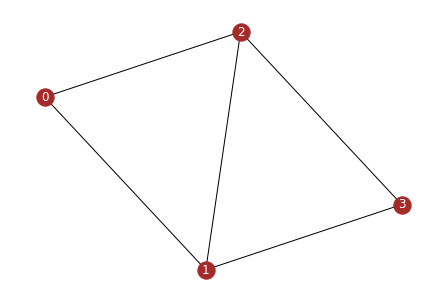

In [152]:
u_g = nx.Graph()
u_g.add_node(0)
u_g.add_edge(0, 1)
u_g.add_edge(1, 2)
u_g.add_edge(2, 3)
u_g.add_edges_from([(2,0),(3, 1)])
nx.draw(u_g, with_labels=True, node_color='brown',font_color='white')

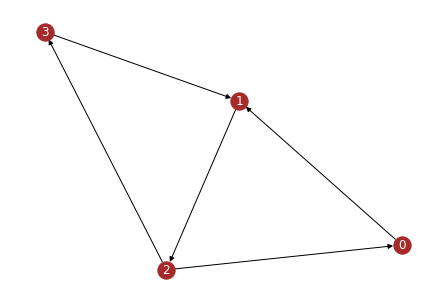

In [153]:
d_g = nx.DiGraph()
d_g.add_node(0)
d_g.add_edge(0, 1)
d_g.add_edge(1, 2)
d_g.add_edge(2, 3)
d_g.add_edges_from([(2, 0), (3, 1)])
nx.draw(d_g, with_labels=True, node_color='brown',font_color='white')

In [154]:
print(u_g.degree,'\n',d_g.degree,'\n')
print(nx.degree_centrality(u_g),'\n',nx.degree_centrality(d_g))

[(0, 2), (1, 3), (2, 3), (3, 2)] 
 [(0, 2), (1, 3), (2, 3), (3, 2)] 

{0: 0.6666666666666666, 1: 1.0, 2: 1.0, 3: 0.6666666666666666} 
 {0: 0.6666666666666666, 1: 1.0, 2: 1.0, 3: 0.6666666666666666}


In [155]:
print(list(nx.shortest_path_length(u_g)),'\n',list(nx.shortest_path_length(d_g)),'\n')
# In u_g, average shortest path lengths to other nodes is 1 for nodes 1 and 2
# In u_g, aAverage shortest path lengths to other nodes is 4/3 for nodes 0 and 3
# In d_g, average shortest path lengths to other nodes: 4/3 for node 1, 3/2 for 2
# In d_g, aAverage shortest path lengths to other nodes is 2 for nodes 0 and 3
print(nx.closeness_centrality(u_g),'\n',nx.closeness_centrality(d_g))

[(0, {0: 0, 1: 1, 2: 1, 3: 2}), (1, {1: 0, 0: 1, 2: 1, 3: 1}), (2, {2: 0, 0: 1, 1: 1, 3: 1}), (3, {3: 0, 1: 1, 2: 1, 0: 2})] 
 [(0, {0: 0, 1: 1, 2: 2, 3: 3}), (1, {1: 0, 2: 1, 0: 2, 3: 2}), (2, {2: 0, 0: 1, 3: 1, 1: 2}), (3, {3: 0, 1: 1, 2: 2, 0: 3})] 

{0: 0.75, 1: 1.0, 2: 1.0, 3: 0.75} 
 {0: 0.5, 1: 0.75, 2: 0.6, 3: 0.5}


In [156]:
print(nx.betweenness_centrality(u_g),'\n',nx.betweenness_centrality(d_g))

{0: 0.0, 1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.0} 
 {0: 0.08333333333333333, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.08333333333333333}


In [157]:
nx.edge_betweenness_centrality(u_g)
# Node betweenness may affect edge_betweenness

{(0, 1): 0.25,
 (0, 2): 0.25,
 (1, 2): 0.16666666666666666,
 (1, 3): 0.25,
 (2, 3): 0.25}

In [158]:
nx.edge_betweenness_centrality(d_g)
# Node betweenness may affect edge_betweenness

{(0, 1): 0.29166666666666663,
 (1, 2): 0.5833333333333333,
 (2, 0): 0.29166666666666663,
 (2, 3): 0.29166666666666663,
 (3, 1): 0.29166666666666663}

## Karate_club, co_purchase and facebook graphs

In [159]:
kc_df = pd.DataFrame(index=kc_g.nodes())
kc_df['club'] = pd.Series(nx.get_node_attributes(kc_g, 'club'))
kc_df['degree'] = pd.Series(dict(kc_g.degree()))
kc_df['eccentricity'] =  pd.Series(nx.eccentricity(kc_g))
kc_df['clustering'] =  pd.Series(nx.clustering(kc_g))
kc_df['degree_centrality'] = pd.Series(nx.degree_centrality(kc_g))
kc_df['closeness'] = pd.Series(nx.closeness_centrality(kc_g))
kc_df['betweenness'] = pd.Series(nx.betweenness_centrality(kc_g))

kc_df

club  degree  eccentricity  ...  degree_centrality  closeness  betweenness
0    Mr. Hi      16             3  ...           0.484848   0.568966     0.437635
1    Mr. Hi       9             3  ...           0.272727   0.485294     0.053937
2    Mr. Hi      10             3  ...           0.303030   0.559322     0.143657
3    Mr. Hi       6             3  ...           0.181818   0.464789     0.011909
4    Mr. Hi       3             4  ...           0.090909   0.379310     0.000631
5    Mr. Hi       4             4  ...           0.121212   0.383721     0.029987
6    Mr. Hi       4             4  ...           0.121212   0.383721     0.029987
7    Mr. Hi       4             4  ...           0.121212   0.440000     0.000000
8    Mr. Hi       5             3  ...           0.151515   0.515625     0.055927
9   Officer       2             4  ...           0.060606   0.434211     0.000848
10   Mr. Hi       3             4  ...           0.090909   0.379310     0.000631
11   Mr. Hi       1             4  ...           0.030303   0.366667     0.000000
12   Mr. Hi       2             4  ...           0.060606   0.370787     0.000000
13   Mr. Hi       5             3  ...           0.151515   0.515625     0.045863
14  Officer       2             5  ...           0.060606   0.370787     0.000000
15  Officer       2             5  ...           0.060606   0.370787     0.000000
16   Mr. Hi       2             5  ...           0.060606   0.284483     0.000000
17   Mr. Hi       2             4  ...           0.060606   0.375000     0.000000
18  Officer       2             5  ...           0.060606   0.370787     0.000000
19   Mr. Hi       3             3  ...           0.090909   0.500000     0.032475
20  Officer       2             5  ...           0.060606   0.370787     0.000000
21   Mr. Hi       2             4  ...           0.060606   0.375000     0.000000
22  Officer       2             5  ...           0.060606   0.370787     0.000000
23  Officer       5             5  ...           0.151515   0.392857     0.017614
24  Officer       3             4  ...           0.090909   0.375000     0.002210
25  Officer       3             4  ...           0.090909   0.375000     0.003840
26  Officer       2             5  ...           0.060606   0.362637     0.000000
27  Officer       4             4  ...           0.121212   0.458333     0.022333
28  Officer       3             4  ...           0.090909   0.452055     0.001795
29  Officer       4             5  ...           0.121212   0.383721     0.002922
30  Officer       4             4  ...           0.121212   0.458333     0.014412
31  Officer       6             3  ...           0.181818   0.540984     0.138276
32  Officer      12             4  ...           0.363636   0.515625     0.145247
33  Officer      17             4  ...           0.515152   0.550000     0.304075

[34 rows x 7 columns]

In [160]:
nx.edge_betweenness_centrality(kc_g)

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

In [161]:
kc_df.drop('club',axis=1).corr()

degree  eccentricity  ...  closeness  betweenness
degree             1.000000     -0.453188  ...   0.771591     0.914643
eccentricity      -0.453188      1.000000  ...  -0.761673    -0.424277
clustering        -0.515168      0.543483  ...  -0.612168    -0.480666
degree_centrality  1.000000     -0.453188  ...   0.771591     0.914643
closeness          0.771591     -0.761673  ...   1.000000     0.717945
betweenness        0.914643     -0.424277  ...   0.717945     1.000000

[6 rows x 6 columns]

In [162]:
copur_sup_df = pd.DataFrame(index=copur_sup_g.nodes())
copur_sup_df['degree'] = pd.Series(dict(copur_sup_g.degree()))
copur_sup_df['eccentricity'] =  pd.Series(nx.eccentricity(copur_sup_g))
copur_sup_df['clustering'] =  pd.Series(nx.clustering(copur_sup_g))
copur_sup_df['degree_centrality'] = pd.Series(nx.degree_centrality(copur_sup_g))
copur_sup_df['closeness'] = pd.Series(nx.closeness_centrality(copur_sup_g))
copur_sup_df['betweenness'] = pd.Series(nx.betweenness_centrality(copur_sup_g))

copur_sup_df

degree  eccentricity  ...  closeness  betweenness
MEAT - FRESH & FROZEN       2             2  ...   0.583333     0.000000
PRODUCE                     6             2  ...   0.875000     0.107143
GROCERY DRY GOODS           7             1  ...   1.000000     0.250000
COMM BREAD                  4             2  ...   0.700000     0.000000
DAIRY                       5             2  ...   0.777778     0.011905
FROZEN FOODS                4             2  ...   0.700000     0.000000
HOUSEHOLD PAPER GOODS       2             2  ...   0.583333     0.000000
DSD GROCERY                 6             2  ...   0.875000     0.107143

[8 rows x 6 columns]

In [163]:
nx.edge_betweenness_centrality(copur_sup_g)

{('COMM BREAD', 'DAIRY'): 0.04464285714285714,
 ('COMM BREAD', 'DSD GROCERY'): 0.0625,
 ('DAIRY', 'DSD GROCERY'): 0.05357142857142857,
 ('DAIRY', 'FROZEN FOODS'): 0.04464285714285714,
 ('FROZEN FOODS', 'DSD GROCERY'): 0.0625,
 ('GROCERY DRY GOODS', 'COMM BREAD'): 0.08035714285714285,
 ('GROCERY DRY GOODS', 'DAIRY'): 0.07142857142857142,
 ('GROCERY DRY GOODS', 'DSD GROCERY'): 0.05357142857142857,
 ('GROCERY DRY GOODS', 'FROZEN FOODS'): 0.08035714285714285,
 ('GROCERY DRY GOODS', 'HOUSEHOLD PAPER GOODS'): 0.14285714285714285,
 ('HOUSEHOLD PAPER GOODS', 'DSD GROCERY'): 0.10714285714285714,
 ('MEAT - FRESH & FROZEN', 'GROCERY DRY GOODS'): 0.14285714285714285,
 ('MEAT - FRESH & FROZEN', 'PRODUCE'): 0.10714285714285714,
 ('PRODUCE', 'COMM BREAD'): 0.0625,
 ('PRODUCE', 'DAIRY'): 0.05357142857142857,
 ('PRODUCE', 'DSD GROCERY'): 0.07142857142857142,
 ('PRODUCE', 'FROZEN FOODS'): 0.0625,
 ('PRODUCE', 'GROCERY DRY GOODS'): 0.05357142857142857}

In [164]:
copur_sup_df.corr()

degree  eccentricity  ...  closeness  betweenness
degree             1.000000     -0.545545  ...   0.986974     0.812444
eccentricity      -0.545545      1.000000  ...  -0.648964    -0.850992
clustering        -0.886914      0.665154  ...  -0.941462    -0.953815
degree_centrality  1.000000     -0.545545  ...   0.986974     0.812444
closeness          0.986974     -0.648964  ...   1.000000     0.894609
betweenness        0.812444     -0.850992  ...   0.894609     1.000000

[6 rows x 6 columns]

In [165]:
copur_conf_df = pd.DataFrame(index=copur_conf_g.nodes())
copur_conf_df['degree'] = pd.Series(dict(copur_conf_g.degree()))
copur_conf_df['out_degree'] = pd.Series(dict(copur_conf_g.out_degree()))
copur_conf_df['in_degree'] = pd.Series(dict(copur_conf_g.in_degree()))
# copur_conf_df['eccentricity'] =  pd.Series(nx.eccentricity(copur_conf_g))
copur_conf_df['clustering'] =  pd.Series(nx.clustering(copur_conf_g))
copur_conf_df['degree_cen'] = pd.Series(nx.degree_centrality(copur_conf_g))
copur_conf_df['out_degree_cen'] = pd.Series(nx.out_degree_centrality(copur_conf_g))
copur_conf_df['in_degree_cen'] = pd.Series(nx.in_degree_centrality(copur_conf_g))
copur_conf_df['closeness'] = pd.Series(nx.closeness_centrality(copur_conf_g))
copur_conf_df['betweenness'] = pd.Series(nx.betweenness_centrality(copur_conf_g))

copur_conf_df

degree  out_degree  ...  closeness  betweenness
MEAT - FRESH & FROZEN       2           2  ...   0.000000     0.000000
PRODUCE                     7           3  ...   0.571429     0.023810
GROCERY DRY GOODS           8           2  ...   0.857143     0.071429
COMM BREAD                  4           4  ...   0.000000     0.000000
DAIRY                       7           3  ...   0.642857     0.047619
FROZEN FOODS                4           4  ...   0.000000     0.000000
HOUSEHOLD PAPER GOODS       2           2  ...   0.000000     0.000000
DSD GROCERY                 6           0  ...   0.875000     0.000000

[8 rows x 9 columns]

In [166]:
nx.edge_betweenness_centrality(copur_conf_g)

{('COMM BREAD', 'DAIRY'): 0.017857142857142856,
 ('COMM BREAD', 'DSD GROCERY'): 0.017857142857142856,
 ('COMM BREAD', 'GROCERY DRY GOODS'): 0.017857142857142856,
 ('COMM BREAD', 'PRODUCE'): 0.017857142857142856,
 ('DAIRY', 'DSD GROCERY'): 0.017857142857142856,
 ('DAIRY', 'GROCERY DRY GOODS'): 0.017857142857142856,
 ('DAIRY', 'PRODUCE'): 0.05357142857142857,
 ('FROZEN FOODS', 'DAIRY'): 0.017857142857142856,
 ('FROZEN FOODS', 'DSD GROCERY'): 0.017857142857142856,
 ('FROZEN FOODS', 'GROCERY DRY GOODS'): 0.017857142857142856,
 ('FROZEN FOODS', 'PRODUCE'): 0.017857142857142856,
 ('GROCERY DRY GOODS', 'DAIRY'): 0.08035714285714285,
 ('GROCERY DRY GOODS', 'DSD GROCERY'): 0.026785714285714284,
 ('HOUSEHOLD PAPER GOODS', 'DSD GROCERY'): 0.017857142857142856,
 ('HOUSEHOLD PAPER GOODS', 'GROCERY DRY GOODS'): 0.05357142857142857,
 ('MEAT - FRESH & FROZEN', 'GROCERY DRY GOODS'): 0.03571428571428571,
 ('MEAT - FRESH & FROZEN', 'PRODUCE'): 0.03571428571428571,
 ('PRODUCE', 'DAIRY'): 0.026785714285714

In [167]:
copur_conf_df.corr()

degree  out_degree  ...  closeness  betweenness
degree          1.000000   -0.093659  ...   0.886824     0.789474
out_degree     -0.093659    1.000000  ...  -0.539629     0.000000
in_degree       0.883022   -0.549972  ...   0.998314     0.662266
clustering     -0.607862    0.679097  ...  -0.818660    -0.636064
degree_cen      1.000000   -0.093659  ...   0.886824     0.789474
out_degree_cen -0.093659    1.000000  ...  -0.539629     0.000000
in_degree_cen   0.883022   -0.549972  ...   0.998314     0.662266
closeness       0.886824   -0.539629  ...   1.000000     0.669835
betweenness     0.789474    0.000000  ...   0.669835     1.000000

[9 rows x 9 columns]

In [168]:
fb_df = pd.DataFrame(index=FBGraph.nodes())
df['name'] = pd.Series(nx.get_node_attributes(FBGraph, 'name'))
fb_df['gender'] = pd.Series(nx.get_node_attributes(FBGraph, 'gender'))
fb_df['age'] = pd.Series(nx.get_node_attributes(FBGraph, 'age'))
fb_df['country'] = pd.Series(nx.get_node_attributes(FBGraph, 'country'))
fb_df['degree'] = pd.Series(dict(FBGraph.degree()))
fb_df['eccentricity'] =  pd.Series(nx.eccentricity(FBGraph))
fb_df['clustering'] =  pd.Series(nx.clustering(FBGraph))
fb_df['degree_cen'] = pd.Series(nx.degree_centrality(FBGraph))
fb_df['closeness'] = pd.Series(nx.closeness_centrality(FBGraph))
fb_df['betweenness'] = pd.Series(nx.betweenness_centrality(FBGraph))
# explroe edge_betweenness_centrality of some of the edges if interested
print(fb_df.index)
fb_df

Index(['99', '5', '982', '911', '156', '502', '256', '292', '796', '190',
       '797', '385', '204', '277', '291', '397', '542', '541', '77', '454',
       '889', '80', '279', '844', '831', '535', '154', '95', '669', '668',
       '667', '665', '664', '578', '575', '574', '573', '572', '259', '258',
       '94', '323', '322', '321', '320', '197', '477', '942', '624', '623',
       '374', '617', '1092', '133', '132', '131', '93', '654', '62', '242',
       '932', '239', '187', '92', '895', '1250', '257', '91', '629', '475',
       '418', '171', '79', '1036', '471', '152', '109', '890', '1015', '614',
       '615', '490', '163', '134', '303', '379', '699', '476', '453', '415',
       '567', '506', '504', '314', '121', '568', '566', '613', '1177'],
      dtype='object')


gender  age         country  ...  degree_cen  closeness  betweenness
99      Male   25   United States  ...    0.040816   0.221219     0.031003
5     Female   27           Japan  ...    0.030612   0.203742     0.011743
982     Male   25   United States  ...    0.040816   0.234450     0.028963
911   Female   26           Japan  ...    0.030612   0.203742     0.011743
156     Male   26          Mexico  ...    0.071429   0.264865     0.146033
...      ...  ...             ...  ...         ...        ...          ...
121   Female   25   United States  ...    0.040816   0.224771     0.174268
568   Female   25   United States  ...    0.030612   0.159091     0.013255
566   Female   25  United Kingdom  ...    0.030612   0.159091     0.013255
613   Female   25   United States  ...    0.030612   0.206316     0.018595
1177  Female   26  United Kingdom  ...    0.030612   0.134801     0.002368

[99 rows x 9 columns]

In [169]:
# Check out edge_betweenness_centrality of all edges of FBGraph if you are interested
# nx.edge_betweenness_centrality(FBGraph)

In [170]:
fb_df.drop({'gender','country'},axis=1).corr()

age    degree  ...  closeness  betweenness
age           1.000000 -0.105436  ...  -0.170661     0.041454
degree       -0.105436  1.000000  ...   0.541950     0.341987
eccentricity -0.160323 -0.382345  ...  -0.732451    -0.534013
clustering   -0.084854  0.231352  ...   0.278066    -0.171962
degree_cen   -0.105436  1.000000  ...   0.541950     0.341987
closeness    -0.170661  0.541950  ...   1.000000     0.492611
betweenness   0.041454  0.341987  ...   0.492611     1.000000

[7 rows x 7 columns]

# Link Prediction - Edge Attachment Measurements

## Common Neighbors

### Not implemented for Digraph

In [171]:
# help(nx.common_neighbors)

In [172]:
list(nx.common_neighbors(G,0,1))

[2, 3]

In [173]:
list(nx.common_neighbors(u_g,0,1))

[2]

In [174]:
s='pair'

In [175]:
print('In G:\n')
print(f'{s:6}|no of comm neighbors|list of comm neighbors\n')
for edge in G.edges:
    print(f'{edge[0]} - {edge[1]} |{len(list(nx.common_neighbors(G,edge[0],edge[1]))):20}| {list(nx.common_neighbors(G,edge[0],edge[1]))}')

print('\n In u_g:\n')
print(f'{s:6}|no of comm neighbors|list of comm neighbors\n')
for edge in u_g.edges:
    print(f'{edge[0]} - {edge[1]} |{len(list(nx.common_neighbors(u_g,edge[0],edge[1]))):20}| {list(nx.common_neighbors(u_g,edge[0],edge[1]))}')

In G:

pair  |no of comm neighbors|list of comm neighbors

0 - 1 |                   2| [2, 3]
0 - 2 |                   2| [1, 3]
0 - 3 |                   2| [1, 2]
1 - 2 |                   2| [0, 3]
1 - 3 |                   2| [0, 2]
2 - 3 |                   2| [0, 1]

 In u_g:

pair  |no of comm neighbors|list of comm neighbors

0 - 1 |                   1| [2]
0 - 2 |                   1| [1]
1 - 2 |                   2| [0, 3]
1 - 3 |                   1| [2]
2 - 3 |                   1| [1]


In [176]:
# help(nx.common_neighbor_centrality)

In [177]:
# By default, common_neighbor_centrality reports edge attachment scores for edges that don't exist yet
list(nx.common_neighbor_centrality(G))

[]

In [178]:
# Provide a list of edges in nx.common_neighbor_centrality()
list(nx.common_neighbor_centrality(G,G.edges))

[(0, 1, 2.4), (0, 2, 2.4), (0, 3, 2.4), (1, 2, 2.4), (1, 3, 2.4), (2, 3, 2.4)]

In [179]:
print('In u_g:\n\n common_neighbor_centrality of non_edges\n',\
      list(nx.common_neighbor_centrality(u_g,list(nx.non_edges(u_g)))),'\n')
print('common_neighbor_centrality of existing edges\n',\
list(nx.common_neighbor_centrality(u_g, u_g.edges)))

In u_g:

 common_neighbor_centrality of non_edges
 [(0, 3, 2.0)] 

common_neighbor_centrality of existing edges
 [(0, 1, 1.5999999999999999), (0, 2, 1.5999999999999999), (1, 2, 2.4), (1, 3, 1.5999999999999999), (2, 3, 1.5999999999999999)]


In [180]:
list(nx.common_neighbor_centrality(u_g, u_g.edges))

[(0, 1, 1.5999999999999999),
 (0, 2, 1.5999999999999999),
 (1, 2, 2.4),
 (1, 3, 1.5999999999999999),
 (2, 3, 1.5999999999999999)]

In [181]:
print('In copur_sup_G:\n')
print(f'{s:46}|no of comm neighbors|list of comm neighbors\n')
for edge in copur_sup_g.edges:
    print(f'{edge[0]:21} - {edge[1]:21} |{len(list(nx.common_neighbors(copur_sup_g,edge[0],edge[1]))):20}|{list(nx.common_neighbors(copur_sup_g,edge[0],edge[1]))}')

In copur_sup_G:

pair                                          |no of comm neighbors|list of comm neighbors

MEAT - FRESH & FROZEN - PRODUCE               |                   1|['GROCERY DRY GOODS']
MEAT - FRESH & FROZEN - GROCERY DRY GOODS     |                   1|['PRODUCE']
PRODUCE               - COMM BREAD            |                   3|['DAIRY', 'GROCERY DRY GOODS', 'DSD GROCERY']
PRODUCE               - FROZEN FOODS          |                   3|['DAIRY', 'GROCERY DRY GOODS', 'DSD GROCERY']
PRODUCE               - DAIRY                 |                   4|['COMM BREAD', 'FROZEN FOODS', 'GROCERY DRY GOODS', 'DSD GROCERY']
PRODUCE               - GROCERY DRY GOODS     |                   5|['MEAT - FRESH & FROZEN', 'COMM BREAD', 'FROZEN FOODS', 'DAIRY', 'DSD GROCERY']
PRODUCE               - DSD GROCERY           |                   4|['COMM BREAD', 'FROZEN FOODS', 'DAIRY', 'GROCERY DRY GOODS']
GROCERY DRY GOODS     - COMM BREAD            |                   3|['DAIRY', 'PR

In [182]:
list(nx.common_neighbor_centrality(copur_sup_g,copur_sup_g.edges))

[('MEAT - FRESH & FROZEN', 'PRODUCE', 2.3999999999999995),
 ('MEAT - FRESH & FROZEN', 'GROCERY DRY GOODS', 2.3999999999999995),
 ('PRODUCE', 'COMM BREAD', 4.0),
 ('PRODUCE', 'FROZEN FOODS', 4.0),
 ('PRODUCE', 'DAIRY', 4.8),
 ('PRODUCE', 'GROCERY DRY GOODS', 5.6),
 ('PRODUCE', 'DSD GROCERY', 4.8),
 ('GROCERY DRY GOODS', 'COMM BREAD', 4.0),
 ('GROCERY DRY GOODS', 'FROZEN FOODS', 4.0),
 ('GROCERY DRY GOODS', 'HOUSEHOLD PAPER GOODS', 2.3999999999999995),
 ('GROCERY DRY GOODS', 'DAIRY', 4.8),
 ('GROCERY DRY GOODS', 'DSD GROCERY', 5.6),
 ('COMM BREAD', 'DAIRY', 4.0),
 ('COMM BREAD', 'DSD GROCERY', 4.0),
 ('DAIRY', 'FROZEN FOODS', 4.0),
 ('DAIRY', 'DSD GROCERY', 4.8),
 ('FROZEN FOODS', 'DSD GROCERY', 4.0),
 ('HOUSEHOLD PAPER GOODS', 'DSD GROCERY', 2.3999999999999995)]

In [183]:
for edge in nx.non_edges(copur_sup_g):
    print(edge[0],edge[1],len(list(nx.common_neighbors(copur_sup_g,edge[0],edge[1]))))

DSD GROCERY MEAT - FRESH & FROZEN 2
HOUSEHOLD PAPER GOODS PRODUCE 2
HOUSEHOLD PAPER GOODS FROZEN FOODS 2
HOUSEHOLD PAPER GOODS MEAT - FRESH & FROZEN 1
HOUSEHOLD PAPER GOODS DAIRY 2
HOUSEHOLD PAPER GOODS COMM BREAD 2
FROZEN FOODS MEAT - FRESH & FROZEN 2
FROZEN FOODS COMM BREAD 4
MEAT - FRESH & FROZEN DAIRY 2
MEAT - FRESH & FROZEN COMM BREAD 2


In [184]:
list(nx.common_neighbor_centrality(copur_sup_g))

[('DSD GROCERY', 'MEAT - FRESH & FROZEN', 2.4),
 ('HOUSEHOLD PAPER GOODS', 'PRODUCE', 2.4),
 ('HOUSEHOLD PAPER GOODS', 'FROZEN FOODS', 2.4),
 ('HOUSEHOLD PAPER GOODS', 'MEAT - FRESH & FROZEN', 1.5999999999999999),
 ('HOUSEHOLD PAPER GOODS', 'DAIRY', 2.4),
 ('HOUSEHOLD PAPER GOODS', 'COMM BREAD', 2.4),
 ('FROZEN FOODS', 'MEAT - FRESH & FROZEN', 2.4),
 ('FROZEN FOODS', 'COMM BREAD', 4.0),
 ('MEAT - FRESH & FROZEN', 'DAIRY', 2.4),
 ('MEAT - FRESH & FROZEN', 'COMM BREAD', 2.4)]

## Jaccard Coefficient

In [185]:
# help(nx.jaccard_coefficient)

In [186]:
list(nx.jaccard_coefficient(G))

[]

In [187]:
list(nx.jaccard_coefficient(G, G.edges))

[(0, 1, 0.5), (0, 2, 0.5), (0, 3, 0.5), (1, 2, 0.5), (1, 3, 0.5), (2, 3, 0.5)]

In [188]:
list(nx.jaccard_coefficient(u_g, u_g.edges))

[(0, 1, 0.25), (0, 2, 0.25), (1, 2, 0.5), (1, 3, 0.25), (2, 3, 0.25)]

In [189]:
list(nx.jaccard_coefficient(u_g))

[(0, 3, 1.0)]

In [190]:
list(nx.jaccard_coefficient(copur_sup_g, copur_sup_g.edges))

[('MEAT - FRESH & FROZEN', 'PRODUCE', 0.14285714285714285),
 ('MEAT - FRESH & FROZEN', 'GROCERY DRY GOODS', 0.125),
 ('PRODUCE', 'COMM BREAD', 0.42857142857142855),
 ('PRODUCE', 'FROZEN FOODS', 0.42857142857142855),
 ('PRODUCE', 'DAIRY', 0.5714285714285714),
 ('PRODUCE', 'GROCERY DRY GOODS', 0.625),
 ('PRODUCE', 'DSD GROCERY', 0.5),
 ('GROCERY DRY GOODS', 'COMM BREAD', 0.375),
 ('GROCERY DRY GOODS', 'FROZEN FOODS', 0.375),
 ('GROCERY DRY GOODS', 'HOUSEHOLD PAPER GOODS', 0.125),
 ('GROCERY DRY GOODS', 'DAIRY', 0.5),
 ('GROCERY DRY GOODS', 'DSD GROCERY', 0.625),
 ('COMM BREAD', 'DAIRY', 0.5),
 ('COMM BREAD', 'DSD GROCERY', 0.42857142857142855),
 ('DAIRY', 'FROZEN FOODS', 0.5),
 ('DAIRY', 'DSD GROCERY', 0.5714285714285714),
 ('FROZEN FOODS', 'DSD GROCERY', 0.42857142857142855),
 ('HOUSEHOLD PAPER GOODS', 'DSD GROCERY', 0.14285714285714285)]

In [191]:
list(nx.jaccard_coefficient(copur_sup_g))

[('DSD GROCERY', 'MEAT - FRESH & FROZEN', 0.3333333333333333),
 ('HOUSEHOLD PAPER GOODS', 'PRODUCE', 0.3333333333333333),
 ('HOUSEHOLD PAPER GOODS', 'FROZEN FOODS', 0.5),
 ('HOUSEHOLD PAPER GOODS', 'MEAT - FRESH & FROZEN', 0.3333333333333333),
 ('HOUSEHOLD PAPER GOODS', 'DAIRY', 0.4),
 ('HOUSEHOLD PAPER GOODS', 'COMM BREAD', 0.5),
 ('FROZEN FOODS', 'MEAT - FRESH & FROZEN', 0.5),
 ('FROZEN FOODS', 'COMM BREAD', 1.0),
 ('MEAT - FRESH & FROZEN', 'DAIRY', 0.4),
 ('MEAT - FRESH & FROZEN', 'COMM BREAD', 0.5)]

# Compare common_neighbor_centrality and jaccard_coefficients based on ground truths

## Karate Club and small Facebook graphs

In [192]:
kc_no_df = pd.DataFrame(list(nx.common_neighbor_centrality(kc_g)),columns=['node1', 'node2','cn_cen'])
kc_no_df

node1  node2    cn_cen
0        0     32  5.800000
1        0     33  6.600000
2        0      9  4.200000
3        0     14  2.266667
4        0     15  2.266667
..     ...    ...       ...
478     28     29  4.200000
479     28     30  4.200000
480     29     30  5.000000
481     29     31  5.000000
482     30     31  5.000000

[483 rows x 3 columns]

In [193]:
preds = nx.jaccard_coefficient(kc_g)
preds_p = []
for u, v, p in preds:
  preds_p.append(p)
kc_no_df['jaccard'] = pd.Series(preds_p)
y_col = pd.Series(0, name='HasEdge').repeat(len(kc_no_df)).reset_index(drop=True)
kc_no_df = pd.concat([kc_no_df, y_col], axis=1)
kc_no_df

node1  node2    cn_cen   jaccard  HasEdge
0        0     32  5.800000  0.120000        0
1        0     33  6.600000  0.137931        0
2        0      9  4.200000  0.058824        0
3        0     14  2.266667  0.000000        0
4        0     15  2.266667  0.000000        0
..     ...    ...       ...       ...      ...
478     28     29  4.200000  0.166667        0
479     28     30  4.200000  0.166667        0
480     29     30  5.000000  0.333333        0
481     29     31  5.000000  0.250000        0
482     30     31  5.000000  0.250000        0

[483 rows x 5 columns]

In [194]:
kc_yes_df = pd.DataFrame(list(nx.common_neighbor_centrality(kc_g,kc_g.edges)),columns=['node1', 'node2','cn_cen'])
preds = nx.jaccard_coefficient(kc_g, kc_g.edges)
preds_p = []
for u, v, p in preds:
  preds_p.append(p)
kc_yes_df['jaccard'] = pd.Series(preds_p)
y_col = pd.Series(1, name='HasEdge').repeat(len(kc_yes_df)).reset_index(drop=True)
kc_yes_df = pd.concat([kc_yes_df, y_col], axis=1)
kc_yes_df

node1  node2  cn_cen   jaccard  HasEdge
0       0      1    12.4  0.388889        1
1       0      2    10.8  0.238095        1
2       0      3    10.8  0.294118        1
3       0      4     8.4  0.117647        1
4       0      5     8.4  0.111111        1
..    ...    ...     ...       ...      ...
73     30     32     8.4  0.142857        1
74     30     33     8.4  0.105263        1
75     31     32     7.6  0.058824        1
76     31     33     8.4  0.095238        1
77     32     33    14.8  0.526316        1

[78 rows x 5 columns]

In [195]:
kc_lp_df = pd.concat([kc_yes_df,kc_no_df]).reset_index(drop=True)
kc_lp_df

node1  node2  cn_cen   jaccard  HasEdge
0        0      1    12.4  0.388889        1
1        0      2    10.8  0.238095        1
2        0      3    10.8  0.294118        1
3        0      4     8.4  0.117647        1
4        0      5     8.4  0.111111        1
..     ...    ...     ...       ...      ...
556     28     29     4.2  0.166667        0
557     28     30     4.2  0.166667        0
558     29     30     5.0  0.333333        0
559     29     31     5.0  0.250000        0
560     30     31     5.0  0.250000        0

[561 rows x 5 columns]

In [196]:
kc_lp_df.drop(['node1','node2'],axis=1).corr()
# common_neighbor_centrality is reasonable edge attachment sore to proxy link prediction likelihood

cn_cen   jaccard   HasEdge
cn_cen   1.000000  0.446708  0.775557
jaccard  0.446708  1.000000 -0.021921
HasEdge  0.775557 -0.021921  1.000000

In [197]:
fb_no_df = pd.DataFrame(list(nx.common_neighbor_centrality(FBGraph)),columns=['node1', 'node2','cn_cen'])
preds = nx.jaccard_coefficient(FBGraph)
preds_p = []
for u, v, p in preds:
  preds_p.append(p)
fb_no_df['jaccard'] = pd.Series(preds_p)
y_col = pd.Series(0, name='HasEdge').repeat(len(fb_no_df)).reset_index(drop=True)
fb_no_df = pd.concat([fb_no_df, y_col], axis=1)
fb_yes_df = pd.DataFrame(list(nx.common_neighbor_centrality(FBGraph,FBGraph.edges)),columns=['node1', 'node2','cn_cen'])
preds = nx.jaccard_coefficient(FBGraph, FBGraph.edges)
preds_p = []
for u, v, p in preds:
  preds_p.append(p)
fb_yes_df['jaccard'] = pd.Series(preds_p)
y_col = pd.Series(1, name='HasEdge').repeat(len(fb_yes_df)).reset_index(drop=True)
fb_yes_df = pd.concat([fb_yes_df, y_col], axis=1)
fb_lp_df = pd.concat([fb_yes_df,fb_no_df]).reset_index(drop=True)
fb_lp_df

node1 node2  cn_cen   jaccard  HasEdge
0       99     5  19.800  0.000000        1
1       99   982  20.600  0.142857        1
2       99   911  19.800  0.000000        1
3       99   156  20.600  0.100000        1
4        5   502  19.800  0.000000        1
...    ...   ...     ...       ...      ...
4846   573   667  10.700  0.071429        0
4847   573   844   6.600  0.000000        0
4848   134   667   2.475  0.000000        0
4849   134   844   3.300  0.000000        0
4850   667   844   4.950  0.000000        0

[4851 rows x 5 columns]

In [198]:
fb_lp_df.drop(['node1','node2'],axis=1).corr()
# common_neighbor_centrality is reasonable edge attachment sore to proxy link prediction likelihood

cn_cen   jaccard   HasEdge
cn_cen   1.000000  0.445417  0.782899
jaccard  0.445417  1.000000  0.043400
HasEdge  0.782899  0.043400  1.000000

# Connectivity and clique

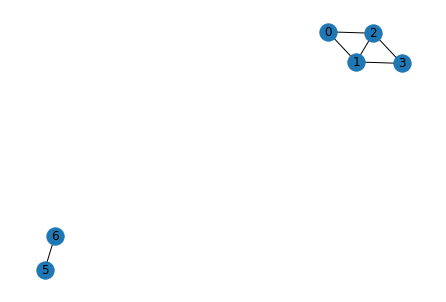

In [199]:
u_g.add_edge(5,6)
nx.draw(u_g, with_labels=True)

In [200]:
nx.is_connected(u_g)

False

In [201]:
list(nx.connected_components(u_g))

[{0, 1, 2, 3}, {5, 6}]

In [202]:
print(nx.is_connected(kc_g),nx.is_connected(copur_sup_g),nx.is_connected(FBGraph))

True True True


In [203]:
nx.is_strongly_connected(d_g)

True

In [204]:
nx.is_strongly_connected(copur_conf_g)

False

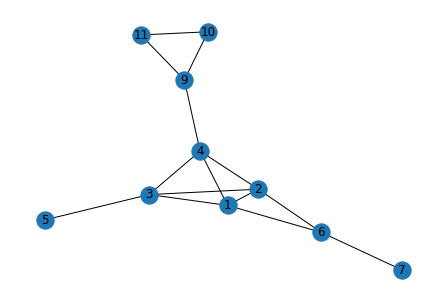

In [205]:
# Create a small graph example using add_edges_from to explore its cliques
c_g = nx.Graph() 

edges = [(1,2), (1,6), (2,3), (2,4), (2,6), (3,4), (3,5), (1,3), (4,9), (6,7), (1,4), (9,10), (10,11), (9,11)] 
c_g.add_edges_from(edges) 

nx.draw(c_g, with_labels = True)

In [206]:
# help(nx.find_cliques)

In [207]:
list(nx.find_cliques(c_g))

[[1, 2, 3, 4], [1, 2, 6], [5, 3], [7, 6], [9, 10, 11], [9, 4]]

In [208]:
# help(nx.community.k_clique_communities)

In [209]:
list(nx.community.k_clique_communities(c_g,3))

[frozenset({1, 2, 3, 4, 6}), frozenset({9, 10, 11})]

In [210]:
list(nx.community.k_clique_communities(c_g,4))

[frozenset({1, 2, 3, 4})]

In [211]:
list(nx.community.k_clique_communities(c_g,2))

[frozenset({1, 2, 3, 4, 5, 6, 7, 9, 10, 11})]

In [212]:
list(nx.find_cliques(kc_g))

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

In [213]:
list(nx.community.k_clique_communities(kc_g,4))

[frozenset({0, 1, 2, 3, 7, 13}),
 frozenset({8, 30, 32, 33}),
 frozenset({23, 29, 32, 33})]

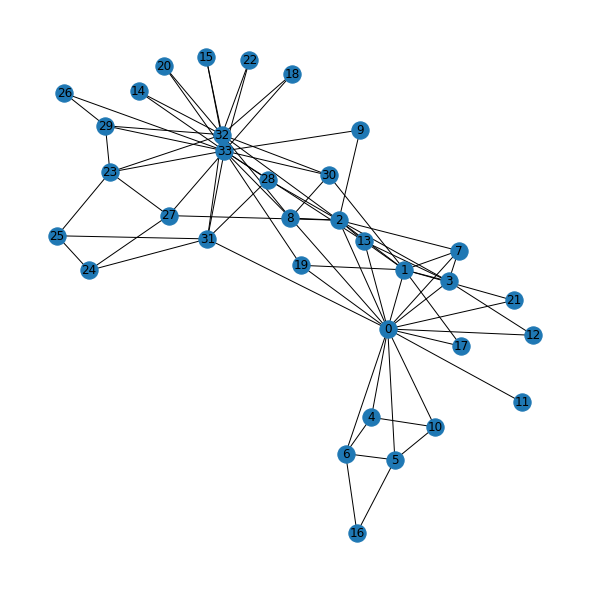

In [214]:
plt.figure(figsize=(8,8))
nx.draw(kc_g, with_labels=True)

In [215]:
list(nx.find_cliques(copur_sup_g))

[['GROCERY DRY GOODS', 'DSD GROCERY', 'HOUSEHOLD PAPER GOODS'],
 ['GROCERY DRY GOODS', 'DSD GROCERY', 'PRODUCE', 'DAIRY', 'FROZEN FOODS'],
 ['GROCERY DRY GOODS', 'DSD GROCERY', 'PRODUCE', 'DAIRY', 'COMM BREAD'],
 ['GROCERY DRY GOODS', 'MEAT - FRESH & FROZEN', 'PRODUCE']]

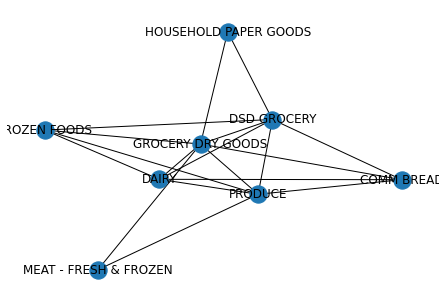

In [216]:
nx.draw(copur_sup_g, with_labels=True)

In [217]:
list(nx.community.k_clique_communities(copur_sup_g,3))

[frozenset({'COMM BREAD',
            'DAIRY',
            'DSD GROCERY',
            'FROZEN FOODS',
            'GROCERY DRY GOODS',
            'HOUSEHOLD PAPER GOODS',
            'MEAT - FRESH & FROZEN',
            'PRODUCE'})]

In [218]:
list(nx.community.k_clique_communities(copur_sup_g,4))

[frozenset({'COMM BREAD',
            'DAIRY',
            'DSD GROCERY',
            'FROZEN FOODS',
            'GROCERY DRY GOODS',
            'PRODUCE'})]

In [219]:
# list(nx.find_cliques(FBGraph))
# Run this code if you are interested in inspecting cliques in FBGraph

In [220]:
list(nx.community.k_clique_communities(FBGraph,3))

[frozenset({'156', '77', '982', '99'}),
 frozenset({'667', '668', '669', '91', '92', '93', '94', '95'}),
 frozenset({'156', '535', '831', '844'}),
 frozenset({'490', '613', '614', '615'}),
 frozenset({'1036', '475', '629', '667', '668', '80'}),
 frozenset({'1250',
            '258',
            '259',
            '572',
            '573',
            '574',
            '575',
            '664',
            '665',
            '95'})]

In [221]:
list(nx.community.k_clique_communities(FBGraph,4))

[]

In [222]:
# help(nx.node_clique_number)

In [223]:
nx.node_clique_number(G)

{0: 4, 1: 4, 2: 4, 3: 4}

In [224]:
nx.node_clique_number(u_g)

{0: 3, 1: 3, 2: 3, 3: 3, 5: 2, 6: 2}

In [225]:
nx.node_clique_number(kc_g)

{0: 5,
 1: 5,
 2: 5,
 3: 5,
 4: 3,
 5: 3,
 6: 3,
 7: 5,
 8: 4,
 9: 2,
 10: 3,
 11: 2,
 12: 3,
 13: 5,
 14: 3,
 15: 3,
 16: 3,
 17: 3,
 18: 3,
 19: 3,
 20: 3,
 21: 3,
 22: 3,
 23: 4,
 24: 3,
 25: 3,
 26: 3,
 27: 3,
 28: 3,
 29: 4,
 30: 4,
 31: 3,
 32: 4,
 33: 4}

In [226]:
nx.node_clique_number(copur_sup_g)

{'COMM BREAD': 5,
 'DAIRY': 5,
 'DSD GROCERY': 5,
 'FROZEN FOODS': 5,
 'GROCERY DRY GOODS': 5,
 'HOUSEHOLD PAPER GOODS': 3,
 'MEAT - FRESH & FROZEN': 3,
 'PRODUCE': 5}

In [227]:
nx.node_clique_number(FBGraph)
# Ranges from 2 to 4

{'1015': 2,
 '1036': 3,
 '109': 2,
 '1092': 2,
 '1177': 2,
 '121': 2,
 '1250': 3,
 '131': 2,
 '132': 2,
 '133': 2,
 '134': 2,
 '152': 2,
 '154': 2,
 '156': 3,
 '163': 2,
 '171': 2,
 '187': 2,
 '190': 2,
 '197': 2,
 '204': 2,
 '239': 2,
 '242': 2,
 '256': 2,
 '257': 2,
 '258': 3,
 '259': 3,
 '277': 2,
 '279': 2,
 '291': 2,
 '292': 2,
 '303': 2,
 '314': 2,
 '320': 2,
 '321': 2,
 '322': 2,
 '323': 2,
 '374': 2,
 '379': 2,
 '385': 2,
 '397': 2,
 '415': 2,
 '418': 2,
 '453': 2,
 '454': 2,
 '471': 2,
 '475': 3,
 '476': 2,
 '477': 2,
 '490': 3,
 '5': 2,
 '502': 2,
 '504': 2,
 '506': 2,
 '535': 3,
 '541': 2,
 '542': 2,
 '566': 2,
 '567': 2,
 '568': 2,
 '572': 3,
 '573': 3,
 '574': 3,
 '575': 3,
 '578': 2,
 '613': 3,
 '614': 3,
 '615': 3,
 '617': 2,
 '62': 2,
 '623': 2,
 '624': 2,
 '629': 3,
 '654': 2,
 '664': 3,
 '665': 3,
 '667': 3,
 '668': 3,
 '669': 3,
 '699': 2,
 '77': 3,
 '79': 2,
 '796': 2,
 '797': 2,
 '80': 3,
 '831': 3,
 '844': 3,
 '889': 2,
 '890': 2,
 '895': 2,
 '91': 3,
 '911': 2,
 

# Isomorphism

In [228]:
G4 = nx.complete_graph(4)


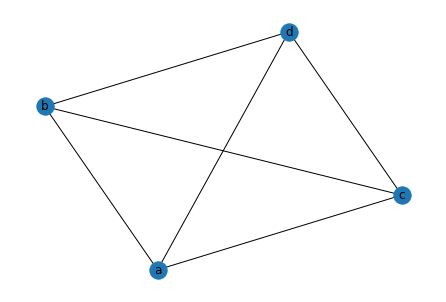

In [229]:
G4 = nx.relabel_nodes(G4, {0:'a',1:'b',2:'c',3:'d'})
nx.draw(G4,with_labels=True)

In [230]:
nx.is_isomorphic(G,G4)

True

In [231]:
# help(nx.graph_edit_distance)

In [232]:
nx.graph_edit_distance(G4,G)

0.0

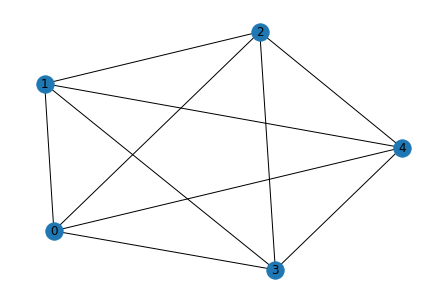

In [233]:
G5=nx.complete_graph(5)
nx.draw(G5,with_labels=True)

In [234]:
nx.graph_edit_distance(G4,G5)

5.0

In [235]:
G4.edges

EdgeView([('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')])

In [236]:
G5.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)])

In [237]:
nx.graph_edit_distance(G,G5)

5.0

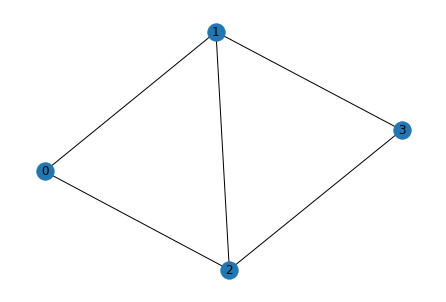

In [238]:
u_g.remove_edge(5,6)
u_g.remove_node(5)
u_g.remove_node(6)
nx.draw(u_g,with_labels=True)

In [239]:
nx.graph_edit_distance(G4,u_g)

1.0

In [240]:
nx.graph_edit_distance(G5,u_g)

6.0

In [241]:
nx.is_isomorphic(G,u_g,edge_match=None,node_match=None)

False

# Bipartite graph

## Import library, show graph info and drawings of bipartite graphs

In [242]:
import networkx.algorithms.bipartite as bipartite

In [243]:
# help(bipartite.is_bipartite)

Graph with 7 nodes and 6 edges 

The statement - b_g is a bipartitle graph is  True 



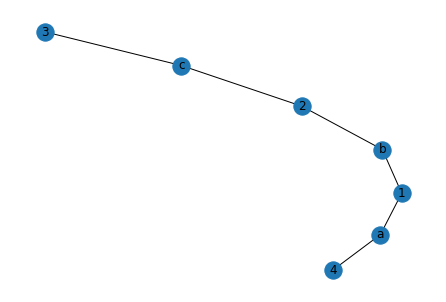

In [244]:
# A simple example
b_g = nx.Graph()
b_g.add_nodes_from([1,2,3,4])
b_g.add_nodes_from(['a','b','c'])
b_g.add_edges_from([(1,'a'), (1,'b'), (2,'b'), (2,'c'), (3,'c'), (4,'a')])

print(nx.info(b_g),'\n')
print('The statement - b_g is a bipartitle graph is ',bipartite.is_bipartite(b_g),'\n')

nx.draw(b_g, with_labels = True)

## Define a function to generate a dataframe of a undirected graph

In [245]:
def undirected_graph_metric_df(g):
  g_df = pd.DataFrame(index=g.nodes())
  g_df['degree'] = pd.Series(dict(g.degree()))
  g_df['eccentricity'] =  pd.Series(nx.eccentricity(g))
  g_df['clustering'] =  pd.Series(nx.clustering(g))
  g_df['degree_centrality'] = pd.Series(nx.degree_centrality(g))
  g_df['closeness'] = pd.Series(nx.closeness_centrality(g))
  g_df['betweenness'] = pd.Series(nx.betweenness_centrality(g))
  return g_df

In [246]:
# Many of the undirected graph functions can be applied to nodes of two types
b_df = undirected_graph_metric_df(b_g)
b_df

degree  eccentricity  clustering  degree_centrality  closeness  betweenness
1       2             4           0           0.333333   0.461538     0.533333
2       2             4           0           0.333333   0.461538     0.533333
3       1             6           0           0.166667   0.285714     0.000000
4       1             6           0           0.166667   0.285714     0.000000
a       2             5           0           0.333333   0.375000     0.333333
b       2             3           0           0.333333   0.500000     0.600000
c       2             5           0           0.333333   0.375000     0.333333

## Create two sets of nodes based on types

In [247]:
#help(nx.bipartite.sets)

In [248]:
l, r = nx.bipartite.sets(b_g)
print('set l:',l,'\n')
print('set r:',r)

set l: {1, 2, 3, 4} 

set r: {'a', 'c', 'b'}


## show biadjacency_matrix

In [249]:
# help(bipartite.biadjacency_matrix)

In [250]:
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(b_g, l, r).todense())

Biadjacency matrix
[[1 0 1]
 [0 1 1]
 [0 1 0]
 [1 0 0]]


## Align nodes of the same type for using nx.draw()

In [251]:
# help(enumerate)

In [252]:
for set_index, node_label in enumerate(l):
  print(set_index,node_label)

0 1
1 2
2 3
3 4


In [253]:
for set_index, node_label in enumerate(r):
  print(set_index,node_label)

0 a
1 c
2 b


In [254]:
# create a customized node layout dictionary - pos1
pos1 = {}
# Update position for drawing with a bipartite group number
# Use update to update the content of pos1
pos1.update((node_label, (1,set_index)) for set_index, node_label in enumerate(l))
pos1.update((node_label, (2,set_index)) for set_index, node_label in enumerate(r))
pos1

{1: (1, 0),
 2: (1, 1),
 3: (1, 2),
 4: (1, 3),
 'a': (2, 0),
 'b': (2, 2),
 'c': (2, 1)}

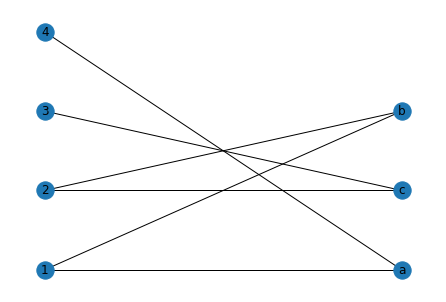

In [255]:
# Align drawing of nodes by node type using the customized node layout dictionary
nx.draw(b_g, pos=pos1, with_labels = True)

## Davis woman club graph

Graph with 32 nodes and 89 edges 

The statement - davis_g is a bipartitle graph is  True 



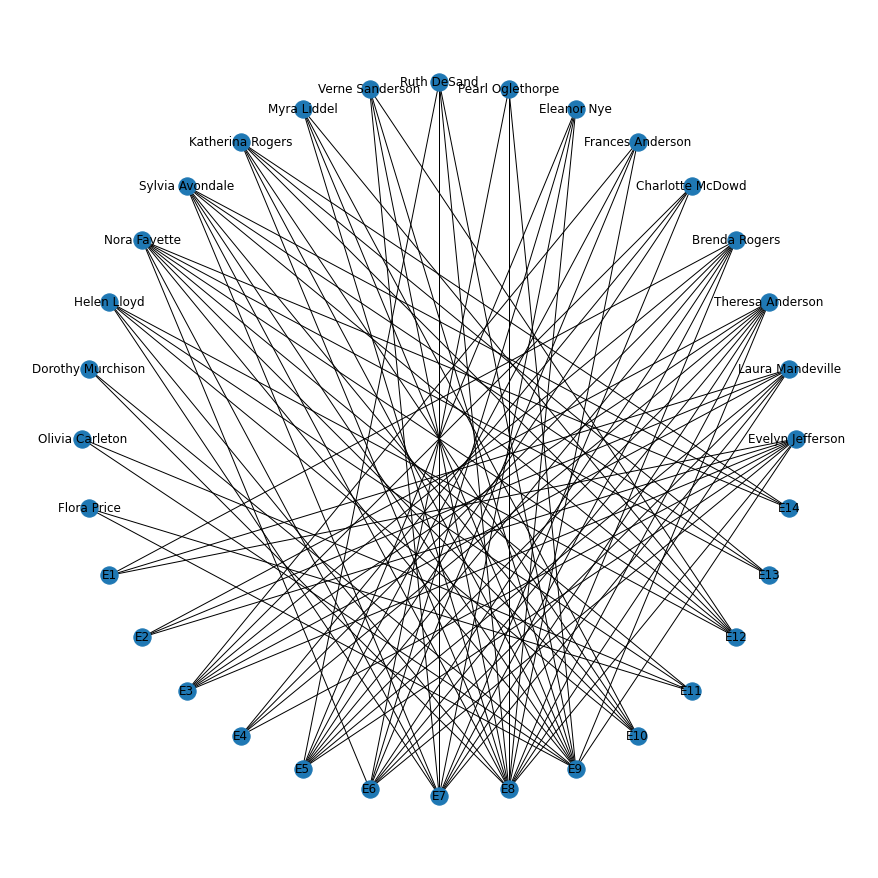

In [256]:
davis_g = nx.davis_southern_women_graph()
print(nx.info(davis_g),'\n')
print('The statement - davis_g is a bipartitle graph is ',bipartite.is_bipartite(davis_g),'\n')
plt.figure(figsize=(12,12))
nx.draw_circular(davis_g, with_labels=True)

In [257]:
dvs_df = undirected_graph_metric_df(davis_g)
dvs_df

degree  eccentricity  ...  closeness  betweenness
Evelyn Jefferson        8             3  ...   0.516667     0.092431
Laura Mandeville        7             4  ...   0.469697     0.049149
Theresa Anderson        8             3  ...   0.516667     0.083827
Brenda Rogers           7             4  ...   0.469697     0.047358
Charlotte McDowd        4             4  ...   0.387500     0.010140
Frances Anderson        4             4  ...   0.430556     0.010254
Eleanor Nye             4             4  ...   0.430556     0.009038
Pearl Oglethorpe        3             4  ...   0.430556     0.006508
Ruth DeSand             4             3  ...   0.455882     0.016061
Verne Sanderson         4             3  ...   0.455882     0.015061
Myra Liddel             4             4  ...   0.442857     0.015641
Katherina Rogers        6             4  ...   0.469697     0.045326
Sylvia Avondale         7             3  ...   0.500000     0.068625
Nora Fayette            8             3  ...   0.516667     0.108581
Helen Lloyd             5             3  ...   0.469697     0.040564
Dorothy Murchison       2             4  ...   0.418919     0.001870
Olivia Carleton         2             4  ...   0.378049     0.004837
Flora Price             2             4  ...   0.378049     0.004837
E1                      3             4  ...   0.369048     0.002094
E2                      3             4  ...   0.369048     0.002030
E3                      6             4  ...   0.397436     0.017715
E4                      4             4  ...   0.378049     0.007487
E5                      8             4  ...   0.418919     0.036641
E6                      8             3  ...   0.484375     0.063199
E7                     10             3  ...   0.516667     0.125881
E8                     14             3  ...   0.596154     0.237003
E9                     12             3  ...   0.553571     0.219209
E10                     5             4  ...   0.387500     0.011122
E11                     4             4  ...   0.378049     0.019116
E12                     6             4  ...   0.397436     0.017588
E13                     3             4  ...   0.369048     0.002178
E14                     3             4  ...   0.369048     0.002178

[32 rows x 6 columns]

In [258]:
women_set, clubs_set = nx.bipartite.sets(davis_g)

In [259]:
women_set

{'Brenda Rogers',
 'Charlotte McDowd',
 'Dorothy Murchison',
 'Eleanor Nye',
 'Evelyn Jefferson',
 'Flora Price',
 'Frances Anderson',
 'Helen Lloyd',
 'Katherina Rogers',
 'Laura Mandeville',
 'Myra Liddel',
 'Nora Fayette',
 'Olivia Carleton',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Sylvia Avondale',
 'Theresa Anderson',
 'Verne Sanderson'}

In [260]:
clubs_set

{'E1',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9'}

In [261]:
print(bipartite.biadjacency_matrix(davis_g, women_set, clubs_set).todense())

[[1 0 0 0 0 0 0 1 0 0 0 0 1 1]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]
 [1 0 1 0 0 0 0 1 0 0 0 0 0 1]
 [1 0 1 1 1 0 1 1 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 1 0 1 1 0 1 1]
 [1 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [1 0 1 1 1 0 1 0 0 0 1 1 0 1]
 [0 1 0 0 0 1 0 0 0 0 0 0 1 1]
 [0 0 1 1 0 0 0 1 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 1 0 0 1 0 1 0]
 [1 0 1 1 1 0 1 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 1 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 1 1 0 1 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0 0 0]]


In [262]:
# print degree information
h1 = 'Member'
h2 = 'Number of Clubs'
print(f'{h1:25} {h2:10}\n')
for w in women_set:
    print(f"{w:25} {davis_g.degree(w):10}")
h3 = 'Club'
h4 = 'Number of Members'
print('\n', f'{h3:25} {h4:10}\n')
for w in clubs_set:
    print(f"{w:25} {davis_g.degree(w):10}")

Member                    Number of Clubs

Ruth DeSand                        4
Theresa Anderson                   8
Verne Sanderson                    4
Sylvia Avondale                    7
Brenda Rogers                      7
Pearl Oglethorpe                   3
Nora Fayette                       8
Charlotte McDowd                   4
Helen Lloyd                        5
Frances Anderson                   4
Katherina Rogers                   6
Laura Mandeville                   7
Eleanor Nye                        4
Flora Price                        2
Evelyn Jefferson                   8
Dorothy Murchison                  2
Olivia Carleton                    2
Myra Liddel                        4

 Club                      Number of Members

E9                                12
E3                                 6
E12                                6
E10                                5
E14                                3
E4                                 4
E13                   

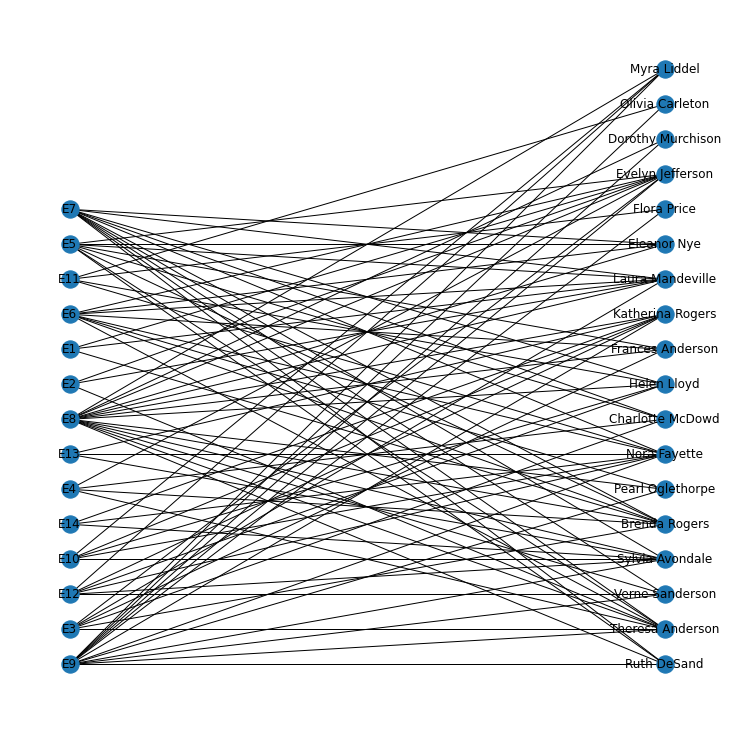

In [263]:
pos_davis = {}

# Update position for node from each group
pos_davis.update((node, (1, index)) for index, node in enumerate(clubs_set))
pos_davis.update((node, (2, index)) for index, node in enumerate(women_set))

plt.figure(figsize=(10,10))
nx.draw(davis_g, pos = pos_davis, with_labels=True)
plt.show()

## Project a bipartite graph onto an undirected graph of a single type of nodes

In [264]:
# help(bipartite.projected_graph)

Graph with 18 nodes and 139 edges 

The statement - women_g is a bipartitle graph is  False 



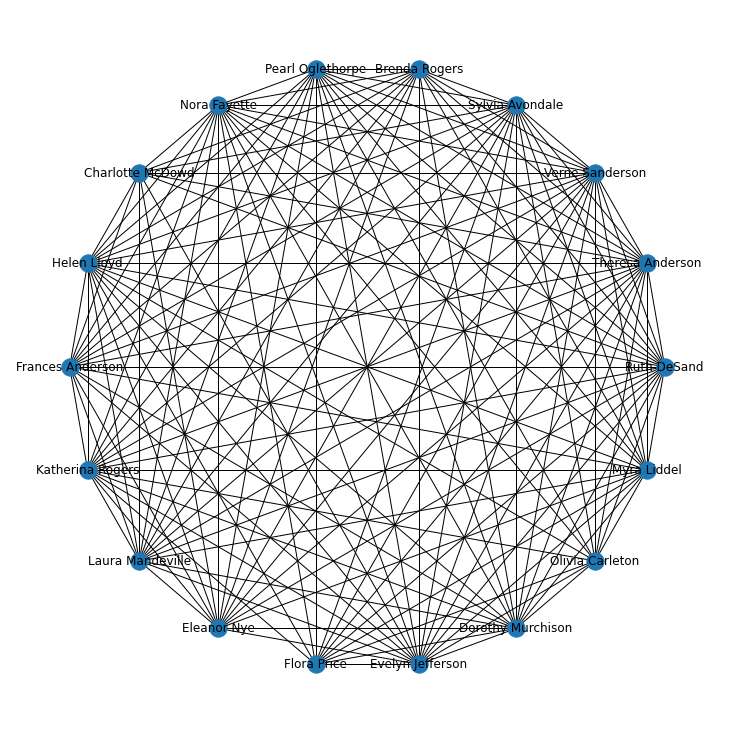

In [265]:
women_g = bipartite.projected_graph(davis_g, women_set)
print(nx.info(women_g),'\n')
print('The statement - women_g is a bipartitle graph is ',bipartite.is_bipartite(women_g),'\n')
plt.figure(figsize=(10,10))
nx.draw_circular(women_g, with_labels=True)

In [266]:
women_df = undirected_graph_metric_df(women_g)
women_df

degree  eccentricity  ...  closeness  betweenness
Ruth DeSand            17             1  ...   1.000000     0.010122
Theresa Anderson       17             1  ...   1.000000     0.010122
Verne Sanderson        17             1  ...   1.000000     0.010122
Sylvia Avondale        17             1  ...   1.000000     0.010122
Brenda Rogers          15             2  ...   0.894737     0.002674
Pearl Oglethorpe       16             2  ...   0.944444     0.005348
Nora Fayette           17             1  ...   1.000000     0.010122
Charlotte McDowd       11             2  ...   0.739130     0.000000
Helen Lloyd            17             1  ...   1.000000     0.010122
Frances Anderson       15             2  ...   0.894737     0.002674
Katherina Rogers       16             2  ...   0.944444     0.005348
Laura Mandeville       15             2  ...   0.894737     0.002674
Eleanor Nye            15             2  ...   0.894737     0.002674
Flora Price            12             2  ...   0.772727     0.000000
Evelyn Jefferson       17             1  ...   1.000000     0.010122
Dorothy Murchison      16             2  ...   0.944444     0.005348
Olivia Carleton        12             2  ...   0.772727     0.000000
Myra Liddel            16             2  ...   0.944444     0.005348

[18 rows x 6 columns]

In [267]:
women_df.corr()

degree  eccentricity  ...  closeness  betweenness
degree             1.000000     -0.666235  ...   0.996315     0.901287
eccentricity      -0.666235      1.000000  ...  -0.721224    -0.904466
clustering        -0.950032      0.838131  ...  -0.973286    -0.989852
degree_centrality  1.000000     -0.666235  ...   0.996315     0.901287
closeness          0.996315     -0.721224  ...   1.000000     0.934856
betweenness        0.901287     -0.904466  ...   0.934856     1.000000

[6 rows x 6 columns]

Graph with 14 nodes and 66 edges 

The statement - clubs_g is a bipartitle graph is  False 



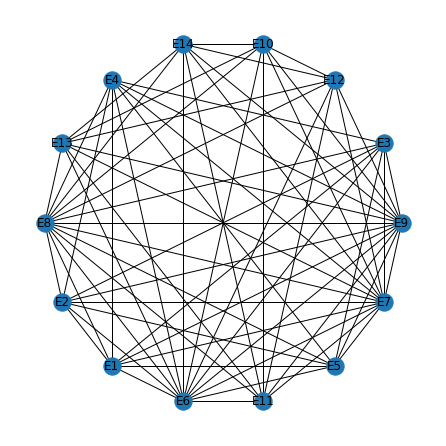

In [268]:
clubs_g = bipartite.projected_graph(davis_g, clubs_set)
print(nx.info(clubs_g),'\n')
print('The statement - clubs_g is a bipartitle graph is ',bipartite.is_bipartite(clubs_g),'\n')
plt.figure(figsize=(6,6))
nx.draw_circular(clubs_g, with_labels=True)

In [269]:
clubs_df = undirected_graph_metric_df(clubs_g)
clubs_df

degree  eccentricity  ...  closeness  betweenness
E9       13             1  ...   1.000000     0.080128
E3        8             2  ...   0.722222     0.000000
E12       8             2  ...   0.722222     0.000000
E10       8             2  ...   0.722222     0.000000
E14       8             2  ...   0.722222     0.000000
E4        8             2  ...   0.722222     0.000000
E13       8             2  ...   0.722222     0.000000
E8       13             1  ...   1.000000     0.080128
E2        8             2  ...   0.722222     0.000000
E1        8             2  ...   0.722222     0.000000
E6       13             1  ...   1.000000     0.080128
E11       8             2  ...   0.722222     0.000000
E5        8             2  ...   0.722222     0.000000
E7       13             1  ...   1.000000     0.080128

[14 rows x 6 columns]

In [270]:
clubs_df.corr()

degree  eccentricity  ...  closeness  betweenness
degree                1.0          -1.0  ...        1.0          1.0
eccentricity         -1.0           1.0  ...       -1.0         -1.0
clustering           -1.0           1.0  ...       -1.0         -1.0
degree_centrality     1.0          -1.0  ...        1.0          1.0
closeness             1.0          -1.0  ...        1.0          1.0
betweenness           1.0          -1.0  ...        1.0          1.0

[6 rows x 6 columns]

## Project a bipartite graph onto a weighted graph

In [271]:
# help(bipartite.weighted_projected_graph)

Graph with 18 nodes and 139 edges 

The statement - women_wg is a bipartitle graph is  False 



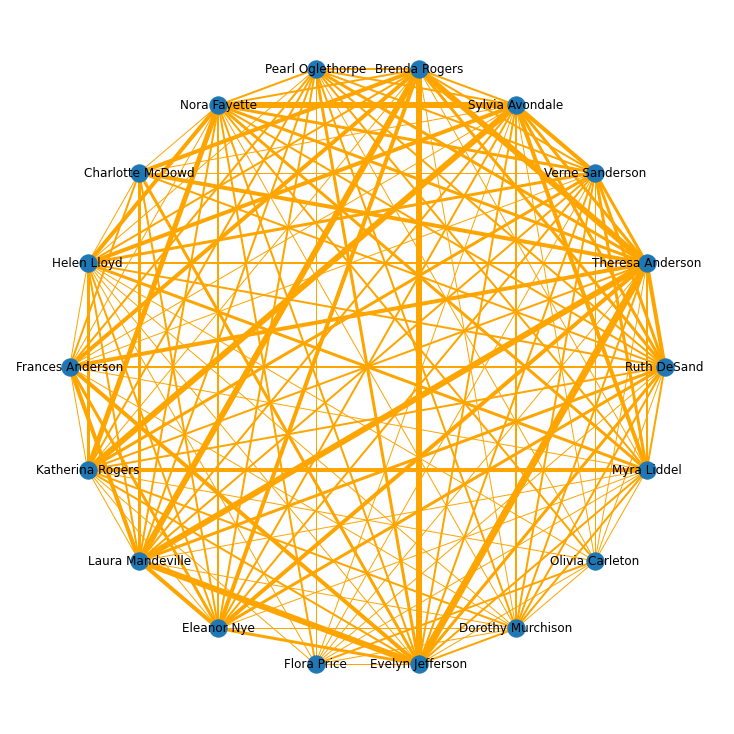

In [272]:
women_wg = bipartite.weighted_projected_graph(davis_g, women_set)
print(nx.info(women_wg),'\n')
print('The statement - women_wg is a bipartitle graph is ',bipartite.is_bipartite(women_wg),'\n')
plt.figure(figsize=(10,10))
comm_clubs =[(women_wg[u][v]['weight']) for u,v in women_wg.edges]
nx.draw_circular(women_wg, width=comm_clubs,edge_color = 'orange',with_labels=True)

In [273]:
women_w_edge_df = pd.DataFrame(list(women_wg.edges.data('weight')))
women_w_edge_df

0                  1  2
0          Ruth DeSand    Verne Sanderson  3
1          Ruth DeSand      Brenda Rogers  3
2          Ruth DeSand    Sylvia Avondale  3
3          Ruth DeSand        Myra Liddel  2
4          Ruth DeSand   Pearl Oglethorpe  2
..                 ...                ... ..
134   Evelyn Jefferson  Dorothy Murchison  2
135   Evelyn Jefferson    Olivia Carleton  1
136  Dorothy Murchison        Myra Liddel  2
137  Dorothy Murchison    Olivia Carleton  1
138    Olivia Carleton        Myra Liddel  1

[139 rows x 3 columns]

Graph with 14 nodes and 66 edges 

The statement - clubs_wg is a bipartitle graph is  False 



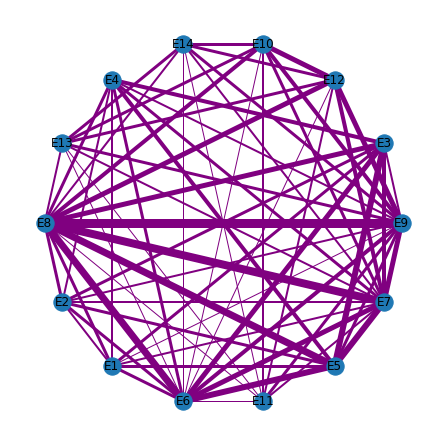

In [274]:
clubs_wg = bipartite.weighted_projected_graph(davis_g, clubs_set)
print(nx.info(clubs_wg),'\n')
print('The statement - clubs_wg is a bipartitle graph is ',bipartite.is_bipartite(clubs_wg),'\n')
plt.figure(figsize=(6,6))
comm_members =[clubs_wg[u][v]['weight'] for u,v in clubs_wg.edges]
nx.draw_circular(clubs_wg, width=comm_members,edge_color = 'purple',with_labels=True)

In [275]:
clubs_w_edge_df = pd.DataFrame(list(clubs_wg.edges.data('weight')))
clubs_w_edge_df

0    1  2
0    E9   E3  2
1    E9  E12  5
2    E9  E10  4
3    E9  E14  3
4    E9   E4  2
..  ...  ... ..
61   E6  E11  1
62   E6   E5  6
63   E6   E7  5
64  E11   E7  2
65   E5   E7  6

[66 rows x 3 columns]

# Watts–Strogatz small-world graph

In [276]:
# help(nx.watts_strogatz_graph)

Graph with 100 nodes and 100 edges


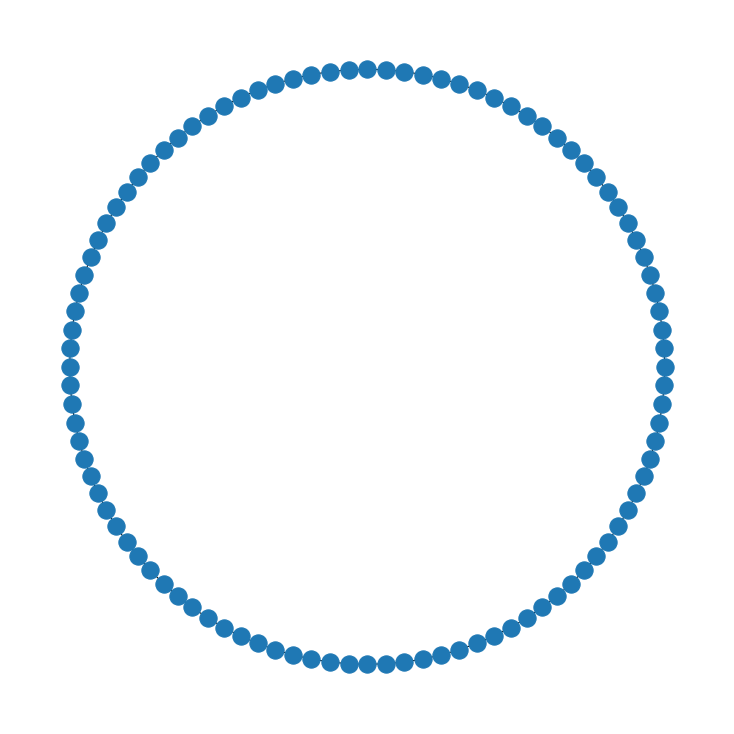

In [277]:
sw_g1 = nx.watts_strogatz_graph(100,2,0.0)
print(nx.info(sw_g1))
plt.figure(figsize=(10,10))
nx.draw_circular(sw_g1)

Graph with 100 nodes and 400 edges


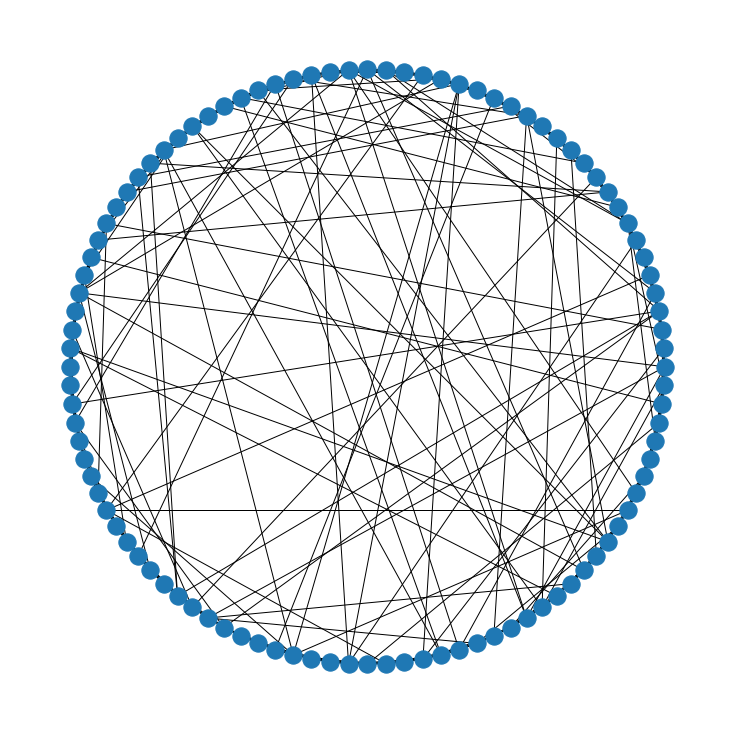

In [278]:
sw_g2 = nx.watts_strogatz_graph(100,8,0.2)
print(nx.info(sw_g2))
plt.figure(figsize=(10,10))
nx.draw_circular(sw_g2)

In [279]:
sw_df2 = undirected_graph_metric_df(sw_g2)
sw_df2

degree  eccentricity  clustering  degree_centrality  closeness  betweenness
0       10             4    0.311111           0.101010   0.397590     0.029527
1        8             4    0.464286           0.080808   0.379310     0.014132
2        8             4    0.392857           0.080808   0.370787     0.014738
3       11             3    0.236364           0.111111   0.424893     0.048570
4        6             4    0.266667           0.060606   0.363971     0.012595
..     ...           ...         ...                ...        ...          ...
95       8             4    0.607143           0.080808   0.341379     0.004775
96       9             4    0.500000           0.090909   0.362637     0.010312
97       9             4    0.500000           0.090909   0.346154     0.013476
98       8             4    0.535714           0.080808   0.343750     0.015787
99      10             4    0.400000           0.101010   0.386719     0.022230

[100 rows x 6 columns]

In [280]:
sw_df2.corr()

degree  eccentricity  ...  closeness  betweenness
degree             1.000000     -0.354478  ...   0.654362     0.688174
eccentricity      -0.354478      1.000000  ...  -0.469424    -0.359669
clustering        -0.257358      0.224592  ...  -0.700552    -0.694161
degree_centrality  1.000000     -0.354478  ...   0.654362     0.688174
closeness          0.654362     -0.469424  ...   1.000000     0.859532
betweenness        0.688174     -0.359669  ...   0.859532     1.000000

[6 rows x 6 columns]

Graph with 100 nodes and 400 edges


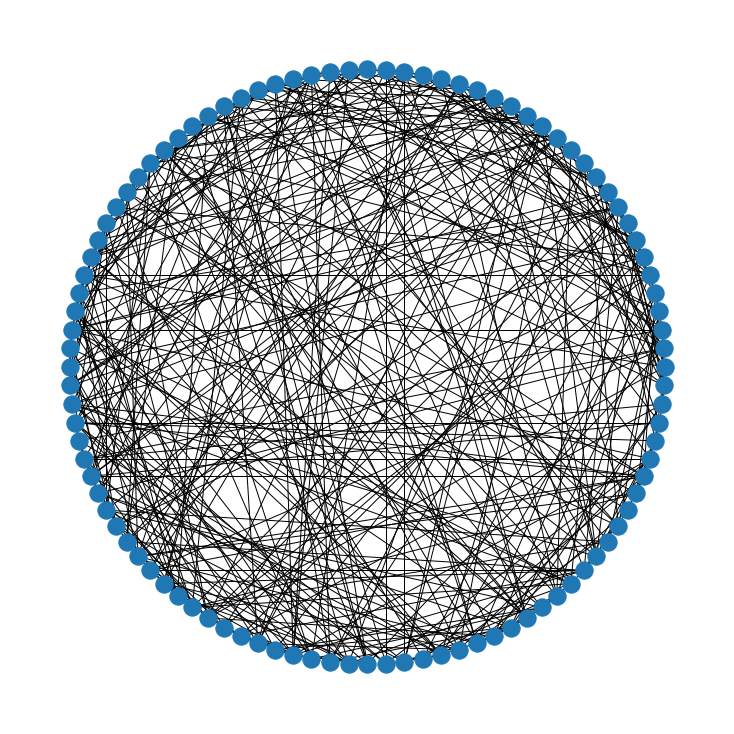

In [281]:
sw_g3 = nx.watts_strogatz_graph(100,8,0.8)
print(nx.info(sw_g3))
plt.figure(figsize=(10,10))
nx.draw_circular(sw_g3)

In [282]:
sw_df3 = undirected_graph_metric_df(sw_g3)
sw_df3

degree  eccentricity  clustering  degree_centrality  closeness  betweenness
0        6             4    0.266667           0.060606   0.392857     0.005175
1        9             3    0.055556           0.090909   0.434211     0.017473
2        7             4    0.000000           0.070707   0.397590     0.010378
3        7             4    0.095238           0.070707   0.399194     0.012187
4        7             4    0.000000           0.070707   0.404082     0.013872
..     ...           ...         ...                ...        ...          ...
95       6             4    0.066667           0.060606   0.388235     0.006229
96       8             4    0.142857           0.080808   0.405738     0.012955
97       7             3    0.142857           0.070707   0.407407     0.009660
98       8             3    0.035714           0.080808   0.417722     0.015112
99       8             3    0.214286           0.080808   0.415966     0.011034

[100 rows x 6 columns]

In [283]:
sw_df3.corr()

degree  eccentricity  ...  closeness  betweenness
degree             1.000000     -0.569666  ...   0.929439     0.969821
eccentricity      -0.569666      1.000000  ...  -0.681850    -0.529850
clustering        -0.109756      0.070965  ...  -0.179386    -0.200593
degree_centrality  1.000000     -0.569666  ...   0.929439     0.969821
closeness          0.929439     -0.681850  ...   1.000000     0.897653
betweenness        0.969821     -0.529850  ...   0.897653     1.000000

[6 rows x 6 columns]

Graph with 100 nodes and 400 edges


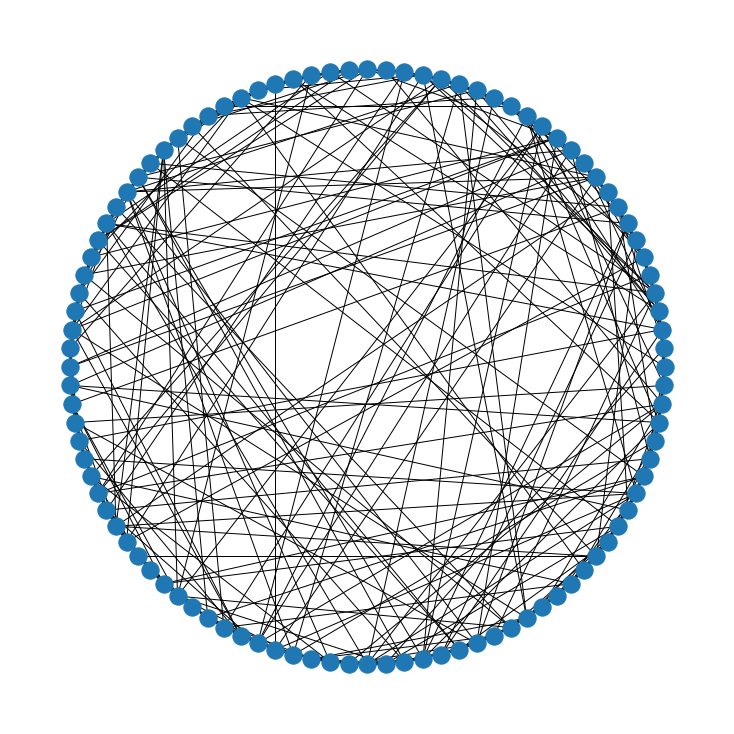

In [284]:
sw_g4 = nx.watts_strogatz_graph(100,8,0.4)
print(nx.info(sw_g4))
plt.figure(figsize=(10,10))
nx.draw_circular(sw_g4)

In [285]:
sw_df4 = undirected_graph_metric_df(sw_g4)
sw_df4

degree  eccentricity  clustering  degree_centrality  closeness  betweenness
0        6             4    0.266667           0.060606   0.385214     0.009598
1       10             4    0.155556           0.101010   0.407407     0.022733
2        8             4    0.071429           0.080808   0.400810     0.016553
3        7             4    0.190476           0.070707   0.382239     0.010221
4        8             4    0.142857           0.080808   0.404082     0.017825
..     ...           ...         ...                ...        ...          ...
95       5             4    0.100000           0.050505   0.377863     0.006317
96       8             4    0.071429           0.080808   0.391304     0.015363
97       7             4    0.000000           0.070707   0.397590     0.016653
98       9             4    0.027778           0.090909   0.419492     0.030918
99       7             4    0.238095           0.070707   0.394422     0.010478

[100 rows x 6 columns]

In [286]:
sw_df4.corr()

degree  eccentricity  ...  closeness  betweenness
degree             1.000000     -0.328976  ...   0.745305     0.816375
eccentricity      -0.328976      1.000000  ...  -0.483153    -0.474837
clustering        -0.057944      0.245153  ...  -0.535149    -0.474106
degree_centrality  1.000000     -0.328976  ...   0.745305     0.816375
closeness          0.745305     -0.483153  ...   1.000000     0.869563
betweenness        0.816375     -0.474837  ...   0.869563     1.000000

[6 rows x 6 columns]

A real world example can be social media follower- following relationship.The graph of the relationships (followed/follower) betweens the users, (so we need the relation_user data) but we are also interested about the credibility of each user (so we need the newsUser and labels_training sets).


The resource for this example is: https://www.kaggle.com/adoury/web-mining-project-web-mining-analysis





# Generate hmtl output file of this notebook

In [289]:
# Enter and run the following lines of commands in your notebook to generate 
# an hmtl file of your notebook with NbConvertApp
# copy the ipynb to the local working directory using ! to run a shell command,
# cp, to copy my notebook in a folder named "Colab Notebooks" 
# to a local working directory referenced via ./

!cp "/content/drive/My Drive/Colab Notebooks/Copy of Graph Mining.ipynb" ./

# run the second shell command, jupyter nbconvert --to html "file name of the notebook"
# create html from ipynb

!jupyter nbconvert --to html "Graph Mining.ipynb"

[NbConvertApp] WARNING | pattern u'Graph Mining.html' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run n